This is a duplicate of mainCode.py and functions.py
The updated code is always in functions.py


This Code is for technical indicators for BTCprice.
The indicators covered in this code are :
Accumulation/Distribution Line,Aroon, Aroon Oscillator, Average Directional Index (ADX), Average True Range (ATR),
%B Indicator, Chaikin Money Flow (CMF), Chaikin Oscillator, Commodity Channel Index (CCI), Coppock Curve, Ease of Movement (EMV), 
Force Index, Mass Index, M ACD, MACD Histogram, Money Flow Index (MFI), 24. Percentage Price Oscillator (PPO), Percentage Volume Oscillator (PVO), 
Pring’s Know Sure Thing (KST), Rate of Change (ROC) and  Momentum,  Relative Strength Index (RSI), Standard Deviation (Volatility), 
Stochastic Oscillator, TRIX, Ulcer Index, Ultimate Oscillator,  Vortex Indicator , Williams %R


#### installed ta using conda install -c conda-forge ta



There are some indicators missing in this file:
UltimateOscillator, volatility/sd, Rate of change, Chaikin money flow  chaikin_oscillator

these indicators are in mainCode.py file

In [5]:
import numpy as np
import pandas as pd


In [6]:
from IPython.display import display

pd.options.display.max_columns = None

import matplotlib.pyplot as plt
from math import floor

In [7]:
from ta.trend import ADXIndicator
from ta.trend import TRIXIndicator
from ta.momentum import AwesomeOscillatorIndicator
from ta.trend import VortexIndicator
from ta.momentum import WilliamsRIndicator

In [8]:
df =pd.read_csv("BTCPrice.csv")

df


,id,assetcode,windowtimestamp,datatype,systemversion,mentions,buzz,sentiment,negative,positive,optimism,pessimism,joy,lovehate,trust,anger,disagreement,fear,gloom,stress,violence,surprise,timeurgency,uncertainty,emotionvsfact,shortvslongterm,marketrisk,longshort,longshortforecast,pricedirection,pricedown,priceforecast,priceup,pricemomentum,topvsbottom,overvaluedvsundervalued,volatility,adoption,adoptionforecast,anonymity,attack,codesentiment,codeupgrade,criminalactivity,developersentiment,fomo,fork,forkforecast,hodl,innovation,litigation,majorityattack,noobs,regulatorycrackdown,regulatoryissues,scam,transactionspeed,vulnerability,partnership,futurevspast,windowtimestamp1,windowtimestamp2,date,close,r_BTC_USD,R_BTC_USD,volume_BTC_USD
0,mp:2014-09-17_19.30.00.News_Social.CRYPTO.BITCOIN,BITCOIN,2014-09-17T19:30:00.000Z,News_Social,MP:4.0.0,1403,4294.2998,0.117598,0.195142,0.312740,0.065785,0.038307,0.008267,0.013390,0.014671,0.006986,0.026314,0.004075,0.010945,0.034464,0.010712,0.001747,0.020958,0.018303,0.403127,0.010945,0.017465,-0.000466,0.000349,0.008034,0.014438,0.000815,0.022472,-0.000699,-0.006404,-0.001048,0.007102,0.015951,0.003260,0.003959,0.008616,0.000699,0.000466,0.011527,0.001630,0.000375,0.001434,0.000454,0.000466,0.010712,0.003260,0.000210,0.000504,0.000233,0.006986,0.000233,0.000931,0.000116,0.002794,-0.206599,9/17/2014,19:30:00.000Z,17-Sep-14,457.334015,NaN,NaN,2.105680e+07
1,mp:2014-09-18_19.30.00.News_Social.CRYPTO.BITCOIN,BITCOIN,2014-09-18T19:30:00.000Z,News_Social,MP:4.0.0,1406,3564.8501,0.036607,0.217821,0.254429,0.056244,0.056805,0.007153,0.004488,0.013745,0.007293,0.013325,0.005190,0.018935,0.035065,0.009117,0.003647,0.020337,0.024657,0.348037,0.001262,0.015288,-0.004348,-0.002244,0.013044,0.020758,0.000421,0.033802,0.000140,-0.002805,-0.000561,0.008626,0.025387,0.002525,0.001683,0.002945,0.000561,0.000281,0.006873,0.001403,0.000375,0.001434,0.000454,0.000281,0.006592,0.001122,0.000210,0.001122,0.002244,0.012483,0.001543,0.003226,0.000561,0.001122,-0.110832,9/18/2014,19:30:00.000Z,18-Sep-14,424.440002,-0.074643,-0.071926,3.448320e+07
2,mp:2014-09-19_19.30.00.News_Social.CRYPTO.BITCOIN,BITCOIN,2014-09-19T19:30:00.000Z,News_Social,MP:4.0.0,1704,5444.1499,-0.073933,0.273229,0.199296,0.052625,0.034349,0.007807,0.003214,-0.013409,0.007623,0.023052,0.004408,0.029206,0.039308,0.006245,0.002663,-0.000643,0.025661,0.285517,-0.003031,0.011939,-0.008633,0.000276,-0.012766,0.034992,-0.000367,0.022226,-0.004133,-0.007898,0.000367,0.015383,0.015705,0.002939,0.002021,0.001837,0.000184,0.001286,0.004959,0.001378,0.000375,0.001434,0.000454,0.001475,0.006613,0.006613,0.000210,0.000184,0.000276,0.013501,0.005327,0.000367,0.000184,0.000367,-0.234371,9/19/2014,19:30:00.000Z,19-Sep-14,394.795990,-0.072402,-0.069843,3.791970e+07
3,mp:2014-09-20_19.30.00.News_Social.CRYPTO.BITCOIN,BITCOIN,2014-09-20T19:30:00.000Z,News_Social,MP:4.0.0,1186,3603.1499,-0.046210,0.245896,0.199686,0.052038,0.032610,0.004996,0.001388,-0.028031,0.010824,0.015819,0.005967,0.026505,0.047736,0.004996,0.002498,0.006383,0.026754,0.343422,0.002637,0.018595,-0.008465,0.001110,-0.002220,0.025394,0.001665,0.023174,-0.001526,-0.004579,-0.000200,0.013669,0.017068,0.001526,0.001943,0.000833,-0.000833,0.000278,0.003330,-0.001388,0.000375,0.000278,0.000454,0.000278,0.003330,0.011518,0.000555,0.000555,0.002082,0.014709,0.006106,0.000555,0.000555,0.002220,-0.224609,9/20/2014,19:30:00.000Z,20-Sep-14,408.903992,0.035111,0.035735,3.686360e+07
4,mp:2014-09-21_19.30.00.News_Social.CRYPTO.BITCOIN,BITCOIN,2014-09-21T19:30:00.000Z,News_Social,MP:4.0.0,937,1590.7000,0.028604,0.209970,0.238574,0.063180,0.070409,0.005344,0.003143,-0.001886,0.004086,0.022632,0.005972,0.017602,0.038034,0.005029,0.003458,0.005029,0.038536,0.387754,0.007230,0.007544,-0.001257,-0.001886,-0.000943,0.019488,-0.000943,0.018545,-0.005344,-0.004401,-0.000200,0.013516,0.011944,0.004086,0.008801,0.004401,0.000756,0.001886,0.006915,0.001886,0.000375,0.001434,0.000454,0.001475,0.006601,0.001886,0.000210,0.00

In [9]:
import yfinance as yf
data = yf.download(tickers='BTC-USD',start =  '2014-09-17',end='2022-11-23',  interval = '1d')

data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2022-11-18 00:00:00+00:00,16687.912109,16947.058594,16564.611328,16697.777344,16697.777344,26862218609
2022-11-19 00:00:00+00:00,16696.220703,16797.876953,16570.410156,16711.546875,16711.546875,16106223492
2022-11-20 00:00:00+00:00,16712.919922,16746.779297,16248.692383,16291.832031,16291.832031,21313378652


In [10]:
data1= data.reset_index()
data1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [11]:
def retDate(x):
    y=x.strftime("%d%b%Y").lower()
    return y


data1['dateFormatted'] = data1['Date'].apply(retDate)

In [12]:
data1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,dateFormatted
0,2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,17sep2014
1,2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,18sep2014
2,2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,19sep2014
3,2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,20sep2014
4,2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,21sep2014


def retPresence(x):
    return x in data1['dateFormatted'].tolist()

df[df['date'].apply(retPresence)]
#in ['17sep2014']

In [13]:
pd.options.display.max_rows = None

In [14]:

print(df['date'].value_counts() >1)
pd.options.display.max_rows = 10

12-Oct-22     True
8-Oct-22      True
21-Oct-22     True
20-Oct-22     True
19-Oct-22     True
18-Oct-22     True
17-Oct-22     True
16-Oct-22     True
15-Oct-22     True
14-Oct-22     True
13-Oct-22     True
11-Oct-22     True
10-Oct-22     True
9-Oct-22      True
7-Oct-22      True
23-Oct-22     True
6-Oct-22      True
5-Oct-22      True
4-Oct-22      True
3-Oct-22      True
2-Oct-22      True
1-Oct-22      True
30-Sep-22     True
29-Sep-22     True
28-Sep-22     True
27-Sep-22     True
26-Sep-22     True
25-Sep-22     True
22-Oct-22     True
24-Oct-22     True
24-Sep-22     True
5-Nov-22      True
26-Oct-22     True
27-Oct-22     True
28-Oct-22     True
29-Oct-22     True
30-Oct-22     True
31-Oct-22     True
25-Oct-22     True
24-Feb-20    False
25-Feb-20    False
26-Feb-20    False
1-Mar-20     False
27-Feb-20    False
28-Feb-20    False
29-Feb-20    False
22-Feb-20    False
2-Mar-20     False
23-Feb-20    False
10-Feb-20    False
21-Feb-20    False
20-Feb-20    False
19-Feb-20   

In [15]:
duplicate = df[df.duplicated()]
duplicate

,id,assetcode,windowtimestamp,datatype,systemversion,mentions,buzz,sentiment,negative,positive,optimism,pessimism,joy,lovehate,trust,anger,disagreement,fear,gloom,stress,violence,surprise,timeurgency,uncertainty,emotionvsfact,shortvslongterm,marketrisk,longshort,longshortforecast,pricedirection,pricedown,priceforecast,priceup,pricemomentum,topvsbottom,overvaluedvsundervalued,volatility,adoption,adoptionforecast,anonymity,attack,codesentiment,codeupgrade,criminalactivity,developersentiment,fomo,fork,forkforecast,hodl,innovation,litigation,majorityattack,noobs,regulatorycrackdown,regulatoryissues,scam,transactionspeed,vulnerability,partnership,futurevspast,windowtimestamp1,windowtimestamp2,date,close,r_BTC_USD,R_BTC_USD,volume_BTC_USD
2944,mp:2022-10-01_19.30.00.News_Social.CRYPTO.BITCOIN,BITCOIN,2022-10-01T19:30:00.000Z,News_Social,MP:4.0.20,24923,91049.898,-0.034657,0.236974,0.202318,0.049132,0.057655,0.007468,0.002438,0.005036,0.012312,0.030692,0.006118,0.030412,0.040774,0.007875,0.003449,-0.004679,0.023309,0.341333,0.008457,0.009868,0.002268,0.001032,0.004843,0.030999,-0.001730,0.035843,-0.002070,-0.005524,-0.000653,0.016700,0.005755,0.001148,0.000780,0.000467,0.000066,0.001406,0.001098,0.000038,0.000088,0.000192,0.000044,0.001197,0.000879,0.000730,0.000082,0.000220,0.001505,0.006161,0.003119,0.000445,0.000368,0.000099,-0.079097,10/1/2022,19:30:00.000Z,1-Oct-22,19312.09570,-0.006179,-0.006160,1.871954e+10
2946,mp:2022-10-02_19.30.00.News_Social.CRYPTO.BITCOIN,BITCOIN,2022-10-02T19:30:00.000Z,News_Social,MP:4.0.20,21817,82897.750,-0.034036,0.227684,0.193648,0.054211,0.057505,0.007666,0.002316,0.005296,0.011176,0.031316,0.005326,0.031883,0.042022,0.007775,0.003908,-0.005048,0.025954,0.363792,0.012033,0.008064,0.003154,0.002443,-0.002202,0.031340,-0.000688,0.029138,-0.000790,-0.004644,-0.000820,0.018110,0.006237,0.001194,0.000790,0.000537,0.000193,0.001556,0.001080,0.000121,0.000139,0.000253,0.000036,0.001520,0.000844,0.000398,0.000072,0.000374,0.000760,0.003577,0.002509,0.000760,0.000404,0.000084,-0.042351,10/2/2022,19:30:00.000Z,2-Oct-22,19044.10742,-0.013974,-0.013877,2.076596e+10
2948,mp:2022-10-03_19.30.00.News_Social.CRYPTO.BITCOIN,BITCOIN,2022-10-03T19:30:00.000Z,News_Social,MP:4.0.20,30805,117184.050,-0.035124,0.230944,0.195820,0.055532,0.059855,0.008525,0.003708,0.004612,0.010620,0.029607,0.004647,0.030516,0.041303,0.009421,0.003337,-0.000418,0.021973,0.338162,0.007859,0.011508,0.005363,0.002547,0.003384,0.030559,-0.001707,0.033942,-0.000188,-0.003883,-0.000243,0.019890,0.008636,0.000772,0.000794,0.000627,0.000183,0.001421,0.001412,0.000098,0.000064,0.000337,0.000111,0.001161,0.000896,0.000405,0.000085,0.000367,0.000738,0.003904,0.002662,0.000905,0.000427,0.000111,-0.049415,10/3/2022,19:30:00.000Z,3-Oct-22,19623.58008,0.029974,0.030428,3.048473e+10
2950,mp:2022-10-04_19.30.00.News_Social.CRYPTO.BITCOIN,BITCOIN,2022-10-04T19:30:00.000Z,News_Social,MP:4.0.20,32567,119582.050,0.005804,0.209839,0.215643,0.060649,0.052863,0.007221,0.003048,0.006565,0.010566,0.031869,0.005235,0.027517,0.040194,0.007125,0.003056,-0.000912,0.021417,0.330062,0.011728,0.029072,0.001957,0.001330,0.020141,0.025756,0.003006,0.045897,0.000610,-0.002789,-0.000192,0.019227,0.009404,0.001468,0.000857,0.000790,0.000230,0.001514,0.001501,0.000071,0.000197,0.000326,0.000046,0.001100,0.000866,0.000665,0.000092,0.000251,0.000577,0.005264,0.002400,0.000213,0.000397,0.000167,-0.059541,10/4/2022,19:30:00.000Z,4-Oct-22,20336.84375,0.035702,0.036347,3.588728e+10
2952,mp:2022-10-05_19.30.00.News_Social.CRYPTO.BITCOIN,BITCOIN,2022-10-05T19:30:00.000Z,News_Social,MP:4.0.20,29994,110302.250,0.005145,0.208731,0.213876,0.063444,0.051699,0.007493,0.002661,0.006491,0.010834,0.033948,0.004592,0.028318,0.039750,0.007130,0.003957,0.001582,0.022078,0.340525,0.012044,0.030775,0.003363,0.001636,0.021577,0.024678,0.003218,0.046255,0.000598,-0.004021,-0.000190,0.018769,0.009148,0.001922,0.000848,0.000734,0.000222,0.001759,0.002185,0.000281,0.000159,0.000394,0.000091,0.001120,0.

In [16]:
df[df['date'] == '01oct2022']

,id,assetcode,windowtimestamp,datatype,systemversion,mentions,buzz,sentiment,negative,positive,optimism,pessimism,joy,lovehate,trust,anger,disagreement,fear,gloom,stress,violence,surprise,timeurgency,uncertainty,emotionvsfact,shortvslongterm,marketrisk,longshort,longshortforecast,pricedirection,pricedown,priceforecast,priceup,pricemomentum,topvsbottom,overvaluedvsundervalued,volatility,adoption,adoptionforecast,anonymity,attack,codesentiment,codeupgrade,criminalactivity,developersentiment,fomo,fork,forkforecast,hodl,innovation,litigation,majorityattack,noobs,regulatorycrackdown,regulatoryissues,scam,transactionspeed,vulnerability,partnership,futurevspast,windowtimestamp1,windowtimestamp2,date,close,r_BTC_USD,R_BTC_USD,volume_BTC_USD


In [17]:
df.drop_duplicates(inplace=True)

In [18]:
pd.options.display.max_rows = None
print(print(df['date'].value_counts() >1))
pd.options.display.max_rows = 10

30-Sep-22     True
29-Sep-22     True
28-Sep-22     True
27-Sep-22     True
26-Sep-22     True
25-Sep-22     True
24-Sep-22     True
5-Nov-22      True
17-Sep-14    False
2-Mar-20     False
25-Feb-20    False
26-Feb-20    False
27-Feb-20    False
28-Feb-20    False
29-Feb-20    False
1-Mar-20     False
6-Mar-20     False
3-Mar-20     False
4-Mar-20     False
5-Mar-20     False
23-Feb-20    False
7-Mar-20     False
8-Mar-20     False
9-Mar-20     False
24-Feb-20    False
22-Feb-20    False
11-Mar-20    False
21-Feb-20    False
31-Jan-20    False
1-Feb-20     False
2-Feb-20     False
3-Feb-20     False
4-Feb-20     False
5-Feb-20     False
6-Feb-20     False
7-Feb-20     False
8-Feb-20     False
9-Feb-20     False
10-Feb-20    False
11-Feb-20    False
12-Feb-20    False
13-Feb-20    False
14-Feb-20    False
15-Feb-20    False
16-Feb-20    False
17-Feb-20    False
18-Feb-20    False
19-Feb-20    False
20-Feb-20    False
10-Mar-20    False
12-Mar-20    False
29-Jan-20    False
6-Apr-20    

Name: date, dtype: bool
None


# duplicate records

In [19]:
def retPresence(x):
    return x in ['30sep2022','29sep2022','28sep2022','27sep2022','26sep2022','25sep2022','24sep2022','05nov2022']

df[df['date'].apply(retPresence)]
#in ['17sep2014']


,id,assetcode,windowtimestamp,datatype,systemversion,mentions,buzz,sentiment,negative,positive,optimism,pessimism,joy,lovehate,trust,anger,disagreement,fear,gloom,stress,violence,surprise,timeurgency,uncertainty,emotionvsfact,shortvslongterm,marketrisk,longshort,longshortforecast,pricedirection,pricedown,priceforecast,priceup,pricemomentum,topvsbottom,overvaluedvsundervalued,volatility,adoption,adoptionforecast,anonymity,attack,codesentiment,codeupgrade,criminalactivity,developersentiment,fomo,fork,forkforecast,hodl,innovation,litigation,majorityattack,noobs,regulatorycrackdown,regulatoryissues,scam,transactionspeed,vulnerability,partnership,futurevspast,windowtimestamp1,windowtimestamp2,date,close,r_BTC_USD,R_BTC_USD,volume_BTC_USD


# there is still duplicate data
# there are multiple records with different value but for same date

In [20]:
df.drop_duplicates(subset='date', keep='first', inplace=True)
df

,id,assetcode,windowtimestamp,datatype,systemversion,mentions,buzz,sentiment,negative,positive,optimism,pessimism,joy,lovehate,trust,anger,disagreement,fear,gloom,stress,violence,surprise,timeurgency,uncertainty,emotionvsfact,shortvslongterm,marketrisk,longshort,longshortforecast,pricedirection,pricedown,priceforecast,priceup,pricemomentum,topvsbottom,overvaluedvsundervalued,volatility,adoption,adoptionforecast,anonymity,attack,codesentiment,codeupgrade,criminalactivity,developersentiment,fomo,fork,forkforecast,hodl,innovation,litigation,majorityattack,noobs,regulatorycrackdown,regulatoryissues,scam,transactionspeed,vulnerability,partnership,futurevspast,windowtimestamp1,windowtimestamp2,date,close,r_BTC_USD,R_BTC_USD,volume_BTC_USD
0,mp:2014-09-17_19.30.00.News_Social.CRYPTO.BITCOIN,BITCOIN,2014-09-17T19:30:00.000Z,News_Social,MP:4.0.0,1403,4294.2998,0.117598,0.195142,0.312740,0.065785,0.038307,0.008267,0.013390,0.014671,0.006986,0.026314,0.004075,0.010945,0.034464,0.010712,0.001747,0.020958,0.018303,0.403127,0.010945,0.017465,-0.000466,0.000349,0.008034,0.014438,0.000815,0.022472,-0.000699,-0.006404,-0.001048,0.007102,0.015951,0.003260,0.003959,0.008616,0.000699,0.000466,0.011527,0.001630,0.000375,0.001434,0.000454,0.000466,0.010712,0.003260,0.000210,0.000504,0.000233,0.006986,0.000233,0.000931,0.000116,0.002794,-0.206599,9/17/2014,19:30:00.000Z,17-Sep-14,457.334015,NaN,NaN,2.105680e+07
1,mp:2014-09-18_19.30.00.News_Social.CRYPTO.BITCOIN,BITCOIN,2014-09-18T19:30:00.000Z,News_Social,MP:4.0.0,1406,3564.8501,0.036607,0.217821,0.254429,0.056244,0.056805,0.007153,0.004488,0.013745,0.007293,0.013325,0.005190,0.018935,0.035065,0.009117,0.003647,0.020337,0.024657,0.348037,0.001262,0.015288,-0.004348,-0.002244,0.013044,0.020758,0.000421,0.033802,0.000140,-0.002805,-0.000561,0.008626,0.025387,0.002525,0.001683,0.002945,0.000561,0.000281,0.006873,0.001403,0.000375,0.001434,0.000454,0.000281,0.006592,0.001122,0.000210,0.001122,0.002244,0.012483,0.001543,0.003226,0.000561,0.001122,-0.110832,9/18/2014,19:30:00.000Z,18-Sep-14,424.440002,-0.074643,-0.071926,3.448320e+07
2,mp:2014-09-19_19.30.00.News_Social.CRYPTO.BITCOIN,BITCOIN,2014-09-19T19:30:00.000Z,News_Social,MP:4.0.0,1704,5444.1499,-0.073933,0.273229,0.199296,0.052625,0.034349,0.007807,0.003214,-0.013409,0.007623,0.023052,0.004408,0.029206,0.039308,0.006245,0.002663,-0.000643,0.025661,0.285517,-0.003031,0.011939,-0.008633,0.000276,-0.012766,0.034992,-0.000367,0.022226,-0.004133,-0.007898,0.000367,0.015383,0.015705,0.002939,0.002021,0.001837,0.000184,0.001286,0.004959,0.001378,0.000375,0.001434,0.000454,0.001475,0.006613,0.006613,0.000210,0.000184,0.000276,0.013501,0.005327,0.000367,0.000184,0.000367,-0.234371,9/19/2014,19:30:00.000Z,19-Sep-14,394.795990,-0.072402,-0.069843,3.791970e+07
3,mp:2014-09-20_19.30.00.News_Social.CRYPTO.BITCOIN,BITCOIN,2014-09-20T19:30:00.000Z,News_Social,MP:4.0.0,1186,3603.1499,-0.046210,0.245896,0.199686,0.052038,0.032610,0.004996,0.001388,-0.028031,0.010824,0.015819,0.005967,0.026505,0.047736,0.004996,0.002498,0.006383,0.026754,0.343422,0.002637,0.018595,-0.008465,0.001110,-0.002220,0.025394,0.001665,0.023174,-0.001526,-0.004579,-0.000200,0.013669,0.017068,0.001526,0.001943,0.000833,-0.000833,0.000278,0.003330,-0.001388,0.000375,0.000278,0.000454,0.000278,0.003330,0.011518,0.000555,0.000555,0.002082,0.014709,0.006106,0.000555,0.000555,0.002220,-0.224609,9/20/2014,19:30:00.000Z,20-Sep-14,408.903992,0.035111,0.035735,3.686360e+07
4,mp:2014-09-21_19.30.00.News_Social.CRYPTO.BITCOIN,BITCOIN,2014-09-21T19:30:00.000Z,News_Social,MP:4.0.0,937,1590.7000,0.028604,0.209970,0.238574,0.063180,0.070409,0.005344,0.003143,-0.001886,0.004086,0.022632,0.005972,0.017602,0.038034,0.005029,0.003458,0.005029,0.038536,0.387754,0.007230,0.007544,-0.001257,-0.001886,-0.000943,0.019488,-0.000943,0.018545,-0.005344,-0.004401,-0.000200,0.013516,0.011944,0.004086,0.008801,0.004401,0.000756,0.001886,0.006915,0.001886,0.000375,0.001434,0.000454,0.001475,0.006601,0.001886,0.000210,0.00

In [21]:
data1

,Date,Open,High,Low,Close,Adj Close,Volume,dateFormatted
0,2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,17sep2014
1,2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,18sep2014
2,2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,19sep2014
3,2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,20sep2014
4,2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,21sep2014
...,...,...,...,...,...,...,...,...
2984,2022-11-18 00:00:00+00:00,16687.912109,16947.058594,16564.611328,16697.777344,16697.777344,26862218609,18nov2022
2985,2022-11-19 00:00:00+00:00,16696.220703,16797.876953,16570.410156,16711.546875,16711.546875,16106223492,19nov2022
2986,2022-11-20 00:00:00+00:00,16712.919922,16746.779297,16248.692383,16291.832031,16291.832031,21313378652,20nov2022
2987,2022-11-21 00:00:00+00:00,16291.223633,16291.223633,15599.046875,15787.284180,15787.284180,37429485518,21nov2022


In [22]:
data1.set_index('dateFormatted',inplace=True)

In [23]:
df.set_index('date',inplace=True)

In [24]:
data1['Adj Close'].equals(data1['Close'])

True

In [25]:
df

,id,assetcode,windowtimestamp,datatype,systemversion,mentions,buzz,sentiment,negative,positive,optimism,pessimism,joy,lovehate,trust,anger,disagreement,fear,gloom,stress,violence,surprise,timeurgency,uncertainty,emotionvsfact,shortvslongterm,marketrisk,longshort,longshortforecast,pricedirection,pricedown,priceforecast,priceup,pricemomentum,topvsbottom,overvaluedvsundervalued,volatility,adoption,adoptionforecast,anonymity,attack,codesentiment,codeupgrade,criminalactivity,developersentiment,fomo,fork,forkforecast,hodl,innovation,litigation,majorityattack,noobs,regulatorycrackdown,regulatoryissues,scam,transactionspeed,vulnerability,partnership,futurevspast,windowtimestamp1,windowtimestamp2,close,r_BTC_USD,R_BTC_USD,volume_BTC_USD
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
17-Sep-14,mp:2014-09-17_19.30.00.News_Social.CRYPTO.BITCOIN,BITCOIN,2014-09-17T19:30:00.000Z,News_Social,MP:4.0.0,1403,4294.2998,0.117598,0.195142,0.312740,0.065785,0.038307,0.008267,0.013390,0.014671,0.006986,0.026314,0.004075,0.010945,0.034464,0.010712,0.001747,0.020958,0.018303,0.403127,0.010945,0.017465,-0.000466,0.000349,0.008034,0.014438,0.000815,0.022472,-0.000699,-0.006404,-0.001048,0.007102,0.015951,0.003260,0.003959,0.008616,0.000699,0.000466,0.011527,0.001630,0.000375,0.001434,0.000454,0.000466,0.010712,0.003260,0.000210,0.000504,0.000233,0.006986,0.000233,0.000931,0.000116,0.002794,-0.206599,9/17/2014,19:30:00.000Z,457.334015,NaN,NaN,2.105680e+07
18-Sep-14,mp:2014-09-18_19.30.00.News_Social.CRYPTO.BITCOIN,BITCOIN,2014-09-18T19:30:00.000Z,News_Social,MP:4.0.0,1406,3564.8501,0.036607,0.217821,0.254429,0.056244,0.056805,0.007153,0.004488,0.013745,0.007293,0.013325,0.005190,0.018935,0.035065,0.009117,0.003647,0.020337,0.024657,0.348037,0.001262,0.015288,-0.004348,-0.002244,0.013044,0.020758,0.000421,0.033802,0.000140,-0.002805,-0.000561,0.008626,0.025387,0.002525,0.001683,0.002945,0.000561,0.000281,0.006873,0.001403,0.000375,0.001434,0.000454,0.000281,0.006592,0.001122,0.000210,0.001122,0.002244,0.012483,0.001543,0.003226,0.000561,0.001122,-0.110832,9/18/2014,19:30:00.000Z,424.440002,-0.074643,-0.071926,3.448320e+07
19-Sep-14,mp:2014-09-19_19.30.00.News_Social.CRYPTO.BITCOIN,BITCOIN,2014-09-19T19:30:00.000Z,News_Social,MP:4.0.0,1704,5444.1499,-0.073933,0.273229,0.199296,0.052625,0.034349,0.007807,0.003214,-0.013409,0.007623,0.023052,0.004408,0.029206,0.039308,0.006245,0.002663,-0.000643,0.025661,0.285517,-0.003031,0.011939,-0.008633,0.000276,-0.012766,0.034992,-0.000367,0.022226,-0.004133,-0.007898,0.000367,0.015383,0.015705,0.002939,0.002021,0.001837,0.000184,0.001286,0.004959,0.001378,0.000375,0.001434,0.000454,0.001475,0.006613,0.006613,0.000210,0.000184,0.000276,0.013501,0.005327,0.000367,0.000184,0.000367,-0.234371,9/19/2014,19:30:00.000Z,394.795990,-0.072402,-0.069843,3.791970e+07
20-Sep-14,mp:2014-09-20_19.30.00.News_Social.CRYPTO.BITCOIN,BITCOIN,2014-09-20T19:30:00.000Z,News_Social,MP:4.0.0,1186,3603.1499,-0.046210,0.245896,0.199686,0.052038,0.032610,0.004996,0.001388,-0.028031,0.010824,0.015819,0.005967,0.026505,0.047736,0.004996,0.002498,0.006383,0.026754,0.343422,0.002637,0.018595,-0.008465,0.001110,-0.002220,0.025394,0.001665,0.023174,-0.001526,-0.004579,-0.000200,0.013669,0.017068,0.001526,0.001943,0.000833,-0.000833,0.000278,0.003330,-0.001388,0.000375,0.000278,0.000454,0.000278,0.003330,0.011518,0.000555,0.000555,0.002082,0.014709,0.006106,0.000555,0.000555,0.002220,-0.224609,9/20/2014,19:30:00.000Z,408.903992,0.035111,0.035735,3.686360e+07
21-Sep-14,mp:2014-09-21_19.30.00.News_Social.CRYPTO.BITCOIN,BITCOIN,2014-09-21T19:30:00.000Z,News_Social,MP:4.0.0,937,1590.7000,0.028604,0.209970,0.238574,0.063180,0.070409,0.005344,0.003143,-0.001886,0.004086,0.022632,0.005972,0.017602,0.038034,0.005029,0.003458,0.005029,0.038536,0.387754,0.007230,0.007544,-0.001257,-0.001886,-0.000943,0.019488,-0.000943,0.018545,-0.005344,-0.004401,-0.000200,0.013516,0.011944,0.004086,0.008801,0.004401,0.000756,0.001886,0.006915,0.001886,0

In [26]:
data1

,Date,Open,High,Low,Close,Adj Close,Volume
dateFormatted,,,,,,,
17sep2014,2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
18sep2014,2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
19sep2014,2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
20sep2014,2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
21sep2014,2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
18nov2022,2022-11-18 00:00:00+00:00,16687.912109,16947.058594,16564.611328,16697.777344,16697.777344,26862218609
19nov2022,2022-11-19 00:00:00+00:00,16696.220703,16797.876953,16570.410156,16711.546875,16711.546875,16106223492
20nov2022,2022-11-20 00:00:00+00:00,16712.919922,16746.779297,16248.692383,16291.832031,16291.832031,21313378652


In [27]:
df.reset_index(inplace=True)

In [28]:
data.reset_index(inplace=True)

In [29]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2984,2022-11-18 00:00:00+00:00,16687.912109,16947.058594,16564.611328,16697.777344,16697.777344,26862218609
2985,2022-11-19 00:00:00+00:00,16696.220703,16797.876953,16570.410156,16711.546875,16711.546875,16106223492
2986,2022-11-20 00:00:00+00:00,16712.919922,16746.779297,16248.692383,16291.832031,16291.832031,21313378652
2987,2022-11-21 00:00:00+00:00,16291.223633,16291.223633,15599.046875,15787.284180,15787.284180,37429485518


In [30]:
df

,date,id,assetcode,windowtimestamp,datatype,systemversion,mentions,buzz,sentiment,negative,positive,optimism,pessimism,joy,lovehate,trust,anger,disagreement,fear,gloom,stress,violence,surprise,timeurgency,uncertainty,emotionvsfact,shortvslongterm,marketrisk,longshort,longshortforecast,pricedirection,pricedown,priceforecast,priceup,pricemomentum,topvsbottom,overvaluedvsundervalued,volatility,adoption,adoptionforecast,anonymity,attack,codesentiment,codeupgrade,criminalactivity,developersentiment,fomo,fork,forkforecast,hodl,innovation,litigation,majorityattack,noobs,regulatorycrackdown,regulatoryissues,scam,transactionspeed,vulnerability,partnership,futurevspast,windowtimestamp1,windowtimestamp2,close,r_BTC_USD,R_BTC_USD,volume_BTC_USD
0,17-Sep-14,mp:2014-09-17_19.30.00.News_Social.CRYPTO.BITCOIN,BITCOIN,2014-09-17T19:30:00.000Z,News_Social,MP:4.0.0,1403,4294.2998,0.117598,0.195142,0.312740,0.065785,0.038307,0.008267,0.013390,0.014671,0.006986,0.026314,0.004075,0.010945,0.034464,0.010712,0.001747,0.020958,0.018303,0.403127,0.010945,0.017465,-0.000466,0.000349,0.008034,0.014438,0.000815,0.022472,-0.000699,-0.006404,-0.001048,0.007102,0.015951,0.003260,0.003959,0.008616,0.000699,0.000466,0.011527,0.001630,0.000375,0.001434,0.000454,0.000466,0.010712,0.003260,0.000210,0.000504,0.000233,0.006986,0.000233,0.000931,0.000116,0.002794,-0.206599,9/17/2014,19:30:00.000Z,457.334015,NaN,NaN,2.105680e+07
1,18-Sep-14,mp:2014-09-18_19.30.00.News_Social.CRYPTO.BITCOIN,BITCOIN,2014-09-18T19:30:00.000Z,News_Social,MP:4.0.0,1406,3564.8501,0.036607,0.217821,0.254429,0.056244,0.056805,0.007153,0.004488,0.013745,0.007293,0.013325,0.005190,0.018935,0.035065,0.009117,0.003647,0.020337,0.024657,0.348037,0.001262,0.015288,-0.004348,-0.002244,0.013044,0.020758,0.000421,0.033802,0.000140,-0.002805,-0.000561,0.008626,0.025387,0.002525,0.001683,0.002945,0.000561,0.000281,0.006873,0.001403,0.000375,0.001434,0.000454,0.000281,0.006592,0.001122,0.000210,0.001122,0.002244,0.012483,0.001543,0.003226,0.000561,0.001122,-0.110832,9/18/2014,19:30:00.000Z,424.440002,-0.074643,-0.071926,3.448320e+07
2,19-Sep-14,mp:2014-09-19_19.30.00.News_Social.CRYPTO.BITCOIN,BITCOIN,2014-09-19T19:30:00.000Z,News_Social,MP:4.0.0,1704,5444.1499,-0.073933,0.273229,0.199296,0.052625,0.034349,0.007807,0.003214,-0.013409,0.007623,0.023052,0.004408,0.029206,0.039308,0.006245,0.002663,-0.000643,0.025661,0.285517,-0.003031,0.011939,-0.008633,0.000276,-0.012766,0.034992,-0.000367,0.022226,-0.004133,-0.007898,0.000367,0.015383,0.015705,0.002939,0.002021,0.001837,0.000184,0.001286,0.004959,0.001378,0.000375,0.001434,0.000454,0.001475,0.006613,0.006613,0.000210,0.000184,0.000276,0.013501,0.005327,0.000367,0.000184,0.000367,-0.234371,9/19/2014,19:30:00.000Z,394.795990,-0.072402,-0.069843,3.791970e+07
3,20-Sep-14,mp:2014-09-20_19.30.00.News_Social.CRYPTO.BITCOIN,BITCOIN,2014-09-20T19:30:00.000Z,News_Social,MP:4.0.0,1186,3603.1499,-0.046210,0.245896,0.199686,0.052038,0.032610,0.004996,0.001388,-0.028031,0.010824,0.015819,0.005967,0.026505,0.047736,0.004996,0.002498,0.006383,0.026754,0.343422,0.002637,0.018595,-0.008465,0.001110,-0.002220,0.025394,0.001665,0.023174,-0.001526,-0.004579,-0.000200,0.013669,0.017068,0.001526,0.001943,0.000833,-0.000833,0.000278,0.003330,-0.001388,0.000375,0.000278,0.000454,0.000278,0.003330,0.011518,0.000555,0.000555,0.002082,0.014709,0.006106,0.000555,0.000555,0.002220,-0.224609,9/20/2014,19:30:00.000Z,408.903992,0.035111,0.035735,3.686360e+07
4,21-Sep-14,mp:2014-09-21_19.30.00.News_Social.CRYPTO.BITCOIN,BITCOIN,2014-09-21T19:30:00.000Z,News_Social,MP:4.0.0,937,1590.7000,0.028604,0.209970,0.238574,0.063180,0.070409,0.005344,0.003143,-0.001886,0.004086,0.022632,0.005972,0.017602,0.038034,0.005029,0.003458,0.005029,0.038536,0.387754,0.007230,0.007544,-0.001257,-0.001886,-0.000943,0.019488,-0.000943,0.018545,-0.005344,-0.004401,-0.000200,0.013516,0.011944,0.004086,0.008801,0.004401,0.000756,0.001886,0.006915,0.001886,0.000375,0.001434,0.000454,0.001475,0.006601,0.001886,0.0

In [31]:
def retDate(x):
    return x.strftime("%d%b%Y").lower()
data['dateFormatted']=data['Date'].apply(retDate)

In [32]:
df

,date,id,assetcode,windowtimestamp,datatype,systemversion,mentions,buzz,sentiment,negative,positive,optimism,pessimism,joy,lovehate,trust,anger,disagreement,fear,gloom,stress,violence,surprise,timeurgency,uncertainty,emotionvsfact,shortvslongterm,marketrisk,longshort,longshortforecast,pricedirection,pricedown,priceforecast,priceup,pricemomentum,topvsbottom,overvaluedvsundervalued,volatility,adoption,adoptionforecast,anonymity,attack,codesentiment,codeupgrade,criminalactivity,developersentiment,fomo,fork,forkforecast,hodl,innovation,litigation,majorityattack,noobs,regulatorycrackdown,regulatoryissues,scam,transactionspeed,vulnerability,partnership,futurevspast,windowtimestamp1,windowtimestamp2,close,r_BTC_USD,R_BTC_USD,volume_BTC_USD
0,17-Sep-14,mp:2014-09-17_19.30.00.News_Social.CRYPTO.BITCOIN,BITCOIN,2014-09-17T19:30:00.000Z,News_Social,MP:4.0.0,1403,4294.2998,0.117598,0.195142,0.312740,0.065785,0.038307,0.008267,0.013390,0.014671,0.006986,0.026314,0.004075,0.010945,0.034464,0.010712,0.001747,0.020958,0.018303,0.403127,0.010945,0.017465,-0.000466,0.000349,0.008034,0.014438,0.000815,0.022472,-0.000699,-0.006404,-0.001048,0.007102,0.015951,0.003260,0.003959,0.008616,0.000699,0.000466,0.011527,0.001630,0.000375,0.001434,0.000454,0.000466,0.010712,0.003260,0.000210,0.000504,0.000233,0.006986,0.000233,0.000931,0.000116,0.002794,-0.206599,9/17/2014,19:30:00.000Z,457.334015,NaN,NaN,2.105680e+07
1,18-Sep-14,mp:2014-09-18_19.30.00.News_Social.CRYPTO.BITCOIN,BITCOIN,2014-09-18T19:30:00.000Z,News_Social,MP:4.0.0,1406,3564.8501,0.036607,0.217821,0.254429,0.056244,0.056805,0.007153,0.004488,0.013745,0.007293,0.013325,0.005190,0.018935,0.035065,0.009117,0.003647,0.020337,0.024657,0.348037,0.001262,0.015288,-0.004348,-0.002244,0.013044,0.020758,0.000421,0.033802,0.000140,-0.002805,-0.000561,0.008626,0.025387,0.002525,0.001683,0.002945,0.000561,0.000281,0.006873,0.001403,0.000375,0.001434,0.000454,0.000281,0.006592,0.001122,0.000210,0.001122,0.002244,0.012483,0.001543,0.003226,0.000561,0.001122,-0.110832,9/18/2014,19:30:00.000Z,424.440002,-0.074643,-0.071926,3.448320e+07
2,19-Sep-14,mp:2014-09-19_19.30.00.News_Social.CRYPTO.BITCOIN,BITCOIN,2014-09-19T19:30:00.000Z,News_Social,MP:4.0.0,1704,5444.1499,-0.073933,0.273229,0.199296,0.052625,0.034349,0.007807,0.003214,-0.013409,0.007623,0.023052,0.004408,0.029206,0.039308,0.006245,0.002663,-0.000643,0.025661,0.285517,-0.003031,0.011939,-0.008633,0.000276,-0.012766,0.034992,-0.000367,0.022226,-0.004133,-0.007898,0.000367,0.015383,0.015705,0.002939,0.002021,0.001837,0.000184,0.001286,0.004959,0.001378,0.000375,0.001434,0.000454,0.001475,0.006613,0.006613,0.000210,0.000184,0.000276,0.013501,0.005327,0.000367,0.000184,0.000367,-0.234371,9/19/2014,19:30:00.000Z,394.795990,-0.072402,-0.069843,3.791970e+07
3,20-Sep-14,mp:2014-09-20_19.30.00.News_Social.CRYPTO.BITCOIN,BITCOIN,2014-09-20T19:30:00.000Z,News_Social,MP:4.0.0,1186,3603.1499,-0.046210,0.245896,0.199686,0.052038,0.032610,0.004996,0.001388,-0.028031,0.010824,0.015819,0.005967,0.026505,0.047736,0.004996,0.002498,0.006383,0.026754,0.343422,0.002637,0.018595,-0.008465,0.001110,-0.002220,0.025394,0.001665,0.023174,-0.001526,-0.004579,-0.000200,0.013669,0.017068,0.001526,0.001943,0.000833,-0.000833,0.000278,0.003330,-0.001388,0.000375,0.000278,0.000454,0.000278,0.003330,0.011518,0.000555,0.000555,0.002082,0.014709,0.006106,0.000555,0.000555,0.002220,-0.224609,9/20/2014,19:30:00.000Z,408.903992,0.035111,0.035735,3.686360e+07
4,21-Sep-14,mp:2014-09-21_19.30.00.News_Social.CRYPTO.BITCOIN,BITCOIN,2014-09-21T19:30:00.000Z,News_Social,MP:4.0.0,937,1590.7000,0.028604,0.209970,0.238574,0.063180,0.070409,0.005344,0.003143,-0.001886,0.004086,0.022632,0.005972,0.017602,0.038034,0.005029,0.003458,0.005029,0.038536,0.387754,0.007230,0.007544,-0.001257,-0.001886,-0.000943,0.019488,-0.000943,0.018545,-0.005344,-0.004401,-0.000200,0.013516,0.011944,0.004086,0.008801,0.004401,0.000756,0.001886,0.006915,0.001886,0.000375,0.001434,0.000454,0.001475,0.006601,0.001886,0.0

In [33]:
df[~(data['dateFormatted']==df['date'])]

,date,id,assetcode,windowtimestamp,datatype,systemversion,mentions,buzz,sentiment,negative,positive,optimism,pessimism,joy,lovehate,trust,anger,disagreement,fear,gloom,stress,violence,surprise,timeurgency,uncertainty,emotionvsfact,shortvslongterm,marketrisk,longshort,longshortforecast,pricedirection,pricedown,priceforecast,priceup,pricemomentum,topvsbottom,overvaluedvsundervalued,volatility,adoption,adoptionforecast,anonymity,attack,codesentiment,codeupgrade,criminalactivity,developersentiment,fomo,fork,forkforecast,hodl,innovation,litigation,majorityattack,noobs,regulatorycrackdown,regulatoryissues,scam,transactionspeed,vulnerability,partnership,futurevspast,windowtimestamp1,windowtimestamp2,close,r_BTC_USD,R_BTC_USD,volume_BTC_USD
0,17-Sep-14,mp:2014-09-17_19.30.00.News_Social.CRYPTO.BITCOIN,BITCOIN,2014-09-17T19:30:00.000Z,News_Social,MP:4.0.0,1403,4294.2998,0.117598,0.195142,0.312740,0.065785,0.038307,0.008267,0.013390,0.014671,0.006986,0.026314,0.004075,0.010945,0.034464,0.010712,0.001747,0.020958,0.018303,0.403127,0.010945,0.017465,-0.000466,0.000349,0.008034,0.014438,0.000815,0.022472,-0.000699,-0.006404,-0.001048,0.007102,0.015951,0.003260,0.003959,0.008616,0.000699,0.000466,0.011527,0.001630,0.000375,0.001434,0.000454,0.000466,0.010712,0.003260,0.000210,0.000504,0.000233,0.006986,0.000233,0.000931,0.000116,0.002794,-0.206599,9/17/2014,19:30:00.000Z,457.334015,NaN,NaN,2.105680e+07
1,18-Sep-14,mp:2014-09-18_19.30.00.News_Social.CRYPTO.BITCOIN,BITCOIN,2014-09-18T19:30:00.000Z,News_Social,MP:4.0.0,1406,3564.8501,0.036607,0.217821,0.254429,0.056244,0.056805,0.007153,0.004488,0.013745,0.007293,0.013325,0.005190,0.018935,0.035065,0.009117,0.003647,0.020337,0.024657,0.348037,0.001262,0.015288,-0.004348,-0.002244,0.013044,0.020758,0.000421,0.033802,0.000140,-0.002805,-0.000561,0.008626,0.025387,0.002525,0.001683,0.002945,0.000561,0.000281,0.006873,0.001403,0.000375,0.001434,0.000454,0.000281,0.006592,0.001122,0.000210,0.001122,0.002244,0.012483,0.001543,0.003226,0.000561,0.001122,-0.110832,9/18/2014,19:30:00.000Z,424.440002,-0.074643,-0.071926,3.448320e+07
2,19-Sep-14,mp:2014-09-19_19.30.00.News_Social.CRYPTO.BITCOIN,BITCOIN,2014-09-19T19:30:00.000Z,News_Social,MP:4.0.0,1704,5444.1499,-0.073933,0.273229,0.199296,0.052625,0.034349,0.007807,0.003214,-0.013409,0.007623,0.023052,0.004408,0.029206,0.039308,0.006245,0.002663,-0.000643,0.025661,0.285517,-0.003031,0.011939,-0.008633,0.000276,-0.012766,0.034992,-0.000367,0.022226,-0.004133,-0.007898,0.000367,0.015383,0.015705,0.002939,0.002021,0.001837,0.000184,0.001286,0.004959,0.001378,0.000375,0.001434,0.000454,0.001475,0.006613,0.006613,0.000210,0.000184,0.000276,0.013501,0.005327,0.000367,0.000184,0.000367,-0.234371,9/19/2014,19:30:00.000Z,394.795990,-0.072402,-0.069843,3.791970e+07
3,20-Sep-14,mp:2014-09-20_19.30.00.News_Social.CRYPTO.BITCOIN,BITCOIN,2014-09-20T19:30:00.000Z,News_Social,MP:4.0.0,1186,3603.1499,-0.046210,0.245896,0.199686,0.052038,0.032610,0.004996,0.001388,-0.028031,0.010824,0.015819,0.005967,0.026505,0.047736,0.004996,0.002498,0.006383,0.026754,0.343422,0.002637,0.018595,-0.008465,0.001110,-0.002220,0.025394,0.001665,0.023174,-0.001526,-0.004579,-0.000200,0.013669,0.017068,0.001526,0.001943,0.000833,-0.000833,0.000278,0.003330,-0.001388,0.000375,0.000278,0.000454,0.000278,0.003330,0.011518,0.000555,0.000555,0.002082,0.014709,0.006106,0.000555,0.000555,0.002220,-0.224609,9/20/2014,19:30:00.000Z,408.903992,0.035111,0.035735,3.686360e+07
4,21-Sep-14,mp:2014-09-21_19.30.00.News_Social.CRYPTO.BITCOIN,BITCOIN,2014-09-21T19:30:00.000Z,News_Social,MP:4.0.0,937,1590.7000,0.028604,0.209970,0.238574,0.063180,0.070409,0.005344,0.003143,-0.001886,0.004086,0.022632,0.005972,0.017602,0.038034,0.005029,0.003458,0.005029,0.038536,0.387754,0.007230,0.007544,-0.001257,-0.001886,-0.000943,0.019488,-0.000943,0.018545,-0.005344,-0.004401,-0.000200,0.013516,0.011944,0.004086,0.008801,0.004401,0.000756,0.001886,0.006915,0.001886,0.000375,0.001434,0.000454,0.001475,0.006601,0.001886,0.0

In [34]:
df[~(data['Volume']==df['volume_BTC_USD'])]

,date,id,assetcode,windowtimestamp,datatype,systemversion,mentions,buzz,sentiment,negative,positive,optimism,pessimism,joy,lovehate,trust,anger,disagreement,fear,gloom,stress,violence,surprise,timeurgency,uncertainty,emotionvsfact,shortvslongterm,marketrisk,longshort,longshortforecast,pricedirection,pricedown,priceforecast,priceup,pricemomentum,topvsbottom,overvaluedvsundervalued,volatility,adoption,adoptionforecast,anonymity,attack,codesentiment,codeupgrade,criminalactivity,developersentiment,fomo,fork,forkforecast,hodl,innovation,litigation,majorityattack,noobs,regulatorycrackdown,regulatoryissues,scam,transactionspeed,vulnerability,partnership,futurevspast,windowtimestamp1,windowtimestamp2,close,r_BTC_USD,R_BTC_USD,volume_BTC_USD
1295,4-Apr-18,mp:2018-04-04_19.30.00.News_Social.CRYPTO.BITCOIN,BITCOIN,2018-04-04T19:30:00.000Z,News_Social,MP:4.0.0,27409,118011.300,0.044013,0.195070,0.239083,0.083958,0.055957,0.006207,0.004326,0.012694,0.007783,0.010461,0.007194,0.023748,0.030150,0.007758,0.003042,0.002864,0.034310,0.321718,0.019210,0.029637,0.003877,-0.002034,0.012982,0.026964,0.007601,0.039945,0.000979,-0.005114,-0.000585,0.014257,0.011372,0.002610,0.000962,0.000627,0.000924,0.000314,0.002538,0.000301,0.000131,0.000415,0.000085,0.001436,0.001496,0.000398,0.000030,0.000614,0.002555,0.004195,0.002534,0.000335,0.000195,0.000123,0.066998,4/4/2018,19:30:00.000Z,6853.839844,-0.084225,-0.080775,4.940000e+09
1440,27-Aug-18,mp:2018-08-27_19.30.00.News_Social.CRYPTO.BITCOIN,BITCOIN,2018-08-27T19:30:00.000Z,News_Social,MP:4.0.0,24746,91541.352,0.015671,0.210801,0.226471,0.082378,0.058979,0.003938,0.002201,0.008488,0.008668,0.017478,0.005659,0.027490,0.033728,0.005517,0.002933,-0.000623,0.031860,0.342499,0.008925,0.024950,0.004949,0.002638,0.004397,0.030604,0.006505,0.035001,0.000213,-0.002245,-0.000246,0.014035,0.008559,0.002179,0.001316,0.001021,-0.000382,0.001000,0.001464,0.000295,0.000147,0.000426,0.000109,0.001600,0.001562,0.000235,0.000131,0.000519,0.002300,0.007133,0.003452,0.000131,0.000388,0.000126,0.025198,8/27/2018,19:30:00.000Z,6884.640137,0.026102,0.026446,4.020000e+09
2308,11-Jan-21,mp:2021-01-11_20.30.00.News_Social.CRYPTO.BITCOIN,BITCOIN,2021-01-11T20:30:00.000Z,News_Social,MP:4.0.1,79546,286986.340,-0.069899,0.239231,0.169332,0.044779,0.062747,0.010086,0.002387,0.004399,0.014736,0.013415,0.005939,0.041951,0.038646,0.005661,0.005215,0.003265,0.021672,0.303128,0.011189,0.001258,-0.007398,-0.000350,-0.008373,0.044161,-0.002531,0.035787,0.000476,-0.004838,-0.000514,0.021530,0.003389,0.000683,0.000556,0.000307,0.000206,0.000505,0.000922,0.000070,0.000624,0.000233,0.000040,0.002803,0.000516,0.000274,0.000057,0.000709,0.000366,0.003430,0.001680,0.000068,0.000359,0.000052,-0.067883,1/11/2021,20:30:00.000Z,35566.656250,-0.075514,-0.072733,1.230000e+11
2326,29-Jan-21,mp:2021-01-29_20.30.00.News_Social.CRYPTO.BITCOIN,BITCOIN,2021-01-29T20:30:00.000Z,News_Social,MP:4.0.1,49394,131681.200,0.024286,0.187316,0.211602,0.052597,0.045527,0.008790,0.003277,0.004078,0.018195,0.022896,0.003786,0.022084,0.033277,0.007826,0.007078,0.010222,0.023798,0.268534,0.020326,0.040993,-0.002149,0.001428,0.033889,0.018959,0.003622,0.052847,0.002286,-0.002278,-0.000448,0.020504,0.005885,0.001264,0.000945,0.000349,0.000182,0.001101,0.001219,0.000049,0.000725,0.000346,0.000046,0.002536,0.001390,0.000816,0.000292,0.000695,0.000627,0.002871,0.001880,0.000030,0.000418,0.000091,-0.102510,1/29/2021,20:30:00.000Z,34316.386720,0.025090,0.025407,1.180000e+11
2336,8-Feb-21,mp:2021-02-08_20.30.00.News_Social.CRYPTO.BITCOIN,BITCOIN,2021-02-08T20:30:00.000Z,News_Social,MP:4.0.2,86586,198590.800,0.029380,0.195125,0.224504,0.068387,0.040445,0.008943,0.003195,0.002780,0.014391,0.041298,0.002432,0.020761,0.028878,0.006330,0.005922,0.009114,0.022869,0.259635,0.013135,0.053225,0.018765,0.004071,0.042016,0.014880,0.004761,0.056896,0.002352,0.002636,-0.000536,0.023521,0.018087,0.010670,0.000748,0.000395,0.000146,0.000929,0.001244,0.000149,0.000665,0.000597,0.000184,0.001558,0

# this clarifies all records have same index


In [35]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,dateFormatted
0,2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,17sep2014
1,2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,18sep2014
2,2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,19sep2014
3,2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,20sep2014
4,2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,21sep2014
...,...,...,...,...,...,...,...,...
2984,2022-11-18 00:00:00+00:00,16687.912109,16947.058594,16564.611328,16697.777344,16697.777344,26862218609,18nov2022
2985,2022-11-19 00:00:00+00:00,16696.220703,16797.876953,16570.410156,16711.546875,16711.546875,16106223492,19nov2022
2986,2022-11-20 00:00:00+00:00,16712.919922,16746.779297,16248.692383,16291.832031,16291.832031,21313378652,20nov2022
2987,2022-11-21 00:00:00+00:00,16291.223633,16291.223633,15599.046875,15787.284180,15787.284180,37429485518,21nov2022


In [36]:
data1 =data.copy()

# 1 Accumulation/Distribution Line:


In [37]:
((5 - 3) - (8 - 5)) / (8 - 3) * 2

-0.4

In [38]:
-1/5

-0.2

### not using this code this code is wrong
### added accumulation/distribution and accumulation/distribution  exponential moving avergae
def acc_dist(data, trend_periods=21, open_col='<OPEN>', high_col='<HIGH>', low_col='<LOW>', close_col='<CLOSE>', vol_col='<VOL>'):
    x=[]
    for index, row in data.iterrows():
        if row[high_col] != row[low_col]:
            ac = ((row[close_col] - row[low_col]) - (row[high_col] - row[close_col])) / (row[high_col] - row[low_col]) * row[vol_col]
        else:
            ac = 0
        x.append(ac)
    data['acc_dist']= x
    data['acc_dist_ema' + str(trend_periods)] = data['acc_dist'].ewm(ignore_na=False, min_periods=0, com=trend_periods, adjust=True).mean()
    
    return data
#acc_dist(df,open_col='
acc_dist(data,open_col='Open', high_col='High', low_col='Low', close_col='Close', vol_col='Volume')

In [39]:

# added accumulation/distribution and accumulation/distribution  exponential moving avergae
def acc_dist(data, trend_periods=21, open_col='<OPEN>', high_col='<HIGH>', low_col='<LOW>', close_col='<CLOSE>', vol_col='<VOL>'):
    x=[]
    for index, row in data.iterrows():
        if row[high_col] != row[low_col]:
            ac = ((row[close_col] - row[low_col]) - (row[high_col] - row[close_col])) / (row[high_col] - row[low_col]) * row[vol_col]
        else:
            ac = 0
        x.append(ac)
    data['MoneyFlowVolume']= x
    A_D=[]
    P_A_D = 0
    for i in range(len(x)):
        A_D.append(P_A_D+x[i])
        P_A_D = P_A_D+x[i]
    data['acc_dist_indicator']= A_D
    
    return data
#acc_dist(df,open_col='
acc_dist(data,open_col='Open', high_col='High', low_col='Low', close_col='Close', vol_col='Volume')

,Date,Open,High,Low,Close,Adj Close,Volume,dateFormatted,MoneyFlowVolume,acc_dist_indicator
0,2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,17sep2014,-7.924336e+06,-7.924336e+06
1,2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,18sep2014,-1.661586e+07,-2.454020e+07
2,2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,19sep2014,-1.994371e+07,-4.448391e+07
3,2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,20sep2014,5.107041e+06,-3.937687e+07
4,2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,21sep2014,-1.100076e+07,-5.037763e+07
...,...,...,...,...,...,...,...,...,...,...
2984,2022-11-18 00:00:00+00:00,16687.912109,16947.058594,16564.611328,16697.777344,16697.777344,26862218609,18nov2022,-8.155668e+09,4.006859e+12
2985,2022-11-19 00:00:00+00:00,16696.220703,16797.876953,16570.410156,16711.546875,16711.546875,16106223492,19nov2022,3.880689e+09,4.010740e+12
2986,2022-11-20 00:00:00+00:00,16712.919922,16746.779297,16248.692383,16291.832031,16291.832031,21313378652,20nov2022,-1.762145e+10,3.993118e+12
2987,2022-11-21 00:00:00+00:00,16291.223633,16291.223633,15599.046875,15787.284180,15787.284180,37429485518,21nov2022,-1.707161e+10,3.976047e+12


# Aroon: Uses Aroon Up and Aroon


In [40]:
# 2. Aroon: Uses Aroon Up and Aroon

def aroon(data, lb=25):

    df = data.copy()
    df['up'] = 100 * df.High.rolling(lb + 1).apply(lambda x: x.argmax()) / lb
    df['dn'] = 100 * df.Low.rolling(lb + 1).apply(lambda x: x.argmin()) / lb

    return df['up'], df['dn']
# this is simple 

data['aroon_up'],data['aroon_down']=aroon(data)




In [41]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,dateFormatted,MoneyFlowVolume,acc_dist_indicator,aroon_up,aroon_down
0,2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,17sep2014,-7.924336e+06,-7.924336e+06,NaN,NaN
1,2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,18sep2014,-1.661586e+07,-2.454020e+07,NaN,NaN
2,2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,19sep2014,-1.994371e+07,-4.448391e+07,NaN,NaN
3,2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,20sep2014,5.107041e+06,-3.937687e+07,NaN,NaN
4,2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,21sep2014,-1.100076e+07,-5.037763e+07,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2984,2022-11-18 00:00:00+00:00,16687.912109,16947.058594,16564.611328,16697.777344,16697.777344,26862218609,18nov2022,-8.155668e+09,4.006859e+12,48.0,64.0
2985,2022-11-19 00:00:00+00:00,16696.220703,16797.876953,16570.410156,16711.546875,16711.546875,16106223492,19nov2022,3.880689e+09,4.010740e+12,44.0,60.0
2986,2022-11-20 00:00:00+00:00,16712.919922,16746.779297,16248.692383,16291.832031,16291.832031,21313378652,20nov2022,-1.762145e+10,3.993118e+12,40.0,56.0
2987,2022-11-21 00:00:00+00:00,16291.223633,16291.223633,15599.046875,15787.284180,15787.284180,37429485518,21nov2022,-1.707161e+10,3.976047e+12,36.0,100.0


In [42]:
data.set_index("Date",inplace=True)

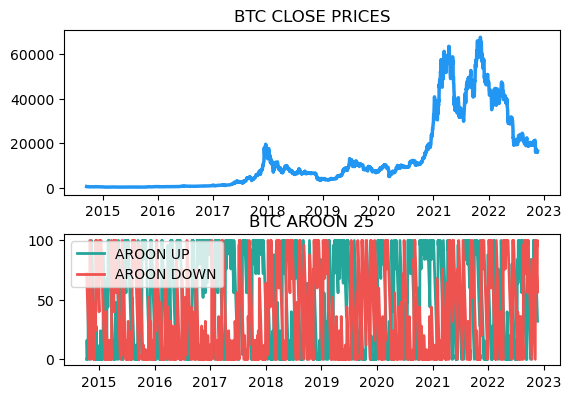

In [43]:

ax1 = plt.subplot2grid((11,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((11,1), (6,0), rowspan = 4, colspan = 1)
ax1.plot(data['Close'], linewidth = 2.5, color = '#2196f3')
ax1.set_title('BTC CLOSE PRICES')
ax2.plot(data['aroon_up'], color = '#26a69a', linewidth = 2, label = 'AROON UP')
ax2.plot(data['aroon_down'], color = '#ef5350', linewidth = 2, label = 'AROON DOWN')
ax2.legend()
ax2.set_title('BTC AROON 25')
plt.show()

data.reset_index(inplace=True)

# Aroon Oscillator=Aroon Up−Aroon Down


In [44]:
data['aroon_oscillator']=data['aroon_up']-data['aroon_down']
data

,Date,Open,High,Low,Close,Adj Close,Volume,dateFormatted,MoneyFlowVolume,acc_dist_indicator,aroon_up,aroon_down,aroon_oscillator
0,2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,17sep2014,-7.924336e+06,-7.924336e+06,NaN,NaN,NaN
1,2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,18sep2014,-1.661586e+07,-2.454020e+07,NaN,NaN,NaN
2,2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,19sep2014,-1.994371e+07,-4.448391e+07,NaN,NaN,NaN
3,2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,20sep2014,5.107041e+06,-3.937687e+07,NaN,NaN,NaN
4,2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,21sep2014,-1.100076e+07,-5.037763e+07,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2984,2022-11-18 00:00:00+00:00,16687.912109,16947.058594,16564.611328,16697.777344,16697.777344,26862218609,18nov2022,-8.155668e+09,4.006859e+12,48.0,64.0,-16.0
2985,2022-11-19 00:00:00+00:00,16696.220703,16797.876953,16570.410156,16711.546875,16711.546875,16106223492,19nov2022,3.880689e+09,4.010740e+12,44.0,60.0,-16.0
2986,2022-11-20 00:00:00+00:00,16712.919922,16746.779297,16248.692383,16291.832031,16291.832031,21313378652,20nov2022,-1.762145e+10,3.993118e+12,40.0,56.0,-16.0
2987,2022-11-21 00:00:00+00:00,16291.223633,16291.223633,15599.046875,15787.284180,15787.284180,37429485518,21nov2022,-1.707161e+10,3.976047e+12,36.0,100.0,-64.0


conda install -c conda-forge ta


# Average Directional Index (ADX)

In [45]:
data.isnull().sum()

Date                   0
Open                   0
High                   0
Low                    0
Close                  0
                      ..
MoneyFlowVolume        0
acc_dist_indicator     0
aroon_up              25
aroon_down            25
aroon_oscillator      25
Length: 13, dtype: int64

In [46]:
data['Adj Open'] = data.Open * data['Adj Close']/data['Close']
data['Adj High'] = data.High * data['Adj Close']/data['Close']
data['Adj Low'] = data.Low * data['Adj Close']/data['Close']


In [47]:
adxI = ADXIndicator(data['Adj High'],data['Adj Low'],data['Adj Close'],14,False)
data['adx_pos_directional_indicator'] = adxI.adx_pos()
data['adx_neg_directional_indicator'] = adxI.adx_neg()
data['adx'] = adxI.adx()
data.tail()

C:\Users\Student\anaconda3\lib\site-packages\ta\trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
C:\Users\Student\anaconda3\lib\site-packages\ta\trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


,Date,Open,High,Low,Close,Adj Close,Volume,dateFormatted,MoneyFlowVolume,acc_dist_indicator,aroon_up,aroon_down,aroon_oscillator,Adj Open,Adj High,Adj Low,adx_pos_directional_indicator,adx_neg_directional_indicator,adx
2984,2022-11-18 00:00:00+00:00,16687.912109,16947.058594,16564.611328,16697.777344,16697.777344,26862218609,18nov2022,-8.155668e+09,4.006859e+12,48.0,64.0,-16.0,16687.912109,16947.058594,16564.611328,10.126249,33.000040,39.869414
2985,2022-11-19 00:00:00+00:00,16696.220703,16797.876953,16570.410156,16711.546875,16711.546875,16106223492,19nov2022,3.880689e+09,4.010740e+12,44.0,60.0,-16.0,16696.220703,16797.876953,16570.410156,9.910023,32.295389,40.810105
2986,2022-11-20 00:00:00+00:00,16712.919922,16746.779297,16248.692383,16291.832031,16291.832031,21313378652,20nov2022,-1.762145e+10,3.993118e+12,40.0,56.0,-16.0,16712.919922,16746.779297,16248.692383,9.434939,33.843618,41.923598
2987,2022-11-21 00:00:00+00:00,16291.223633,16291.223633,15599.046875,15787.284180,15787.284180,37429485518,21nov2022,-1.707161e+10,3.976047e+12,36.0,100.0,-64.0,16291.223633,16291.223633,15599.046875,8.802824,37.858721,43.376875
2988,2022-11-22 00:00:00+00:00,15782.300781,16253.047852,15656.606445,16189.769531,16189.769531,30726828760,22nov2022,2.420702e+10,4.000254e+12,32.0,96.0,-64.0,15782.300781,16253.047852,15656.606445,8.287998,35.644585,44.726346


In [48]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,dateFormatted,MoneyFlowVolume,acc_dist_indicator,aroon_up,aroon_down,aroon_oscillator,Adj Open,Adj High,Adj Low,adx_pos_directional_indicator,adx_neg_directional_indicator,adx
0,2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,17sep2014,-7.924336e+06,-7.924336e+06,NaN,NaN,NaN,465.864014,468.174011,452.421997,0.0,0.0,0.0
1,2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,18sep2014,-1.661586e+07,-2.454020e+07,NaN,NaN,NaN,456.859985,456.859985,413.104004,0.0,0.0,0.0
2,2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,19sep2014,-1.994371e+07,-4.448391e+07,NaN,NaN,NaN,424.102997,427.834991,384.532013,0.0,0.0,0.0
3,2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,20sep2014,5.107041e+06,-3.937687e+07,NaN,NaN,NaN,394.673004,423.295990,389.882996,0.0,0.0,0.0
4,2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,21sep2014,-1.100076e+07,-5.037763e+07,NaN,NaN,NaN,408.084991,412.425995,393.181000,0.0,0.0,0.0


In [49]:
data.set_index('Date',inplace=True)

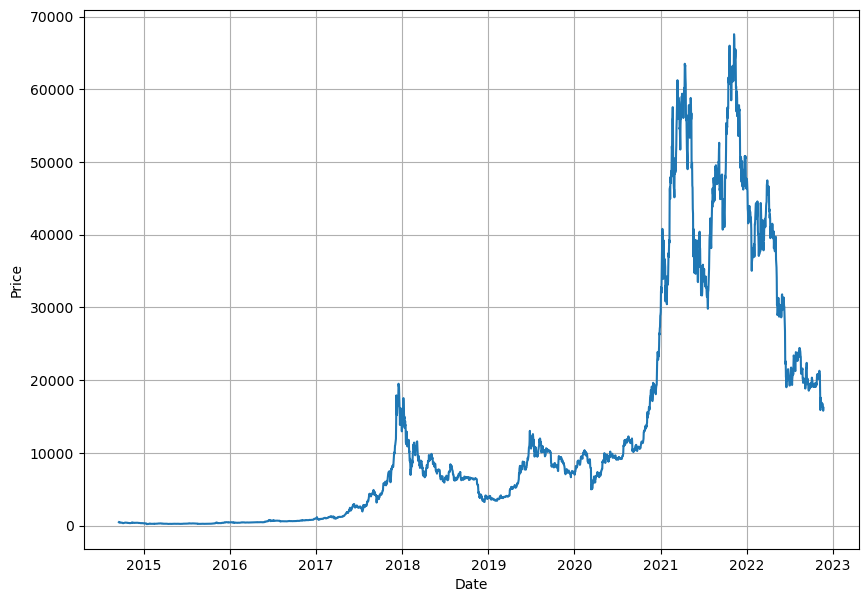

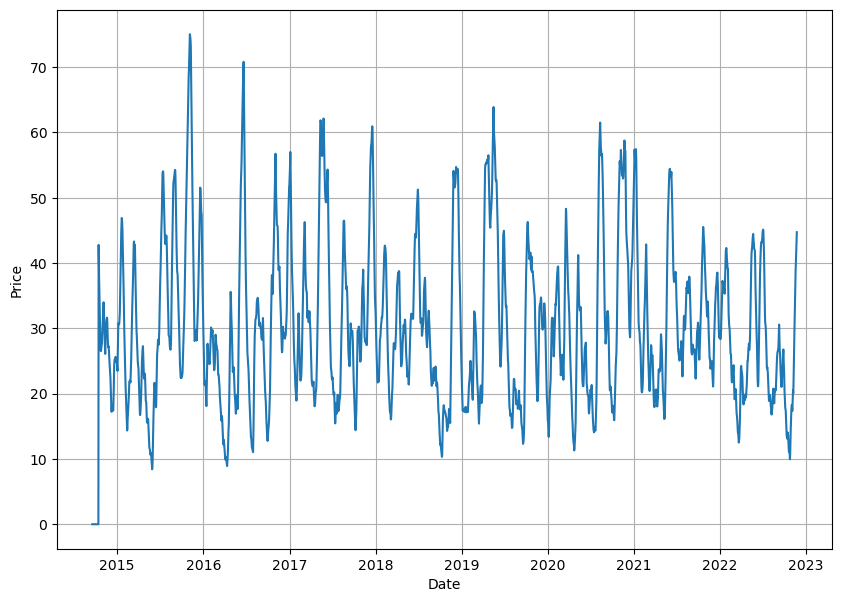

In [50]:
def plot_graph(data,ylabel,xlabel):
    plt.figure(figsize=(10,7))
    plt.grid()
    plt.plot(data)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
plot_graph(data['Adj Close'], 'Price', 'Date')
plot_graph(data['adx'], 'Price', 'Date')

Text(0.5, 0, 'Date')

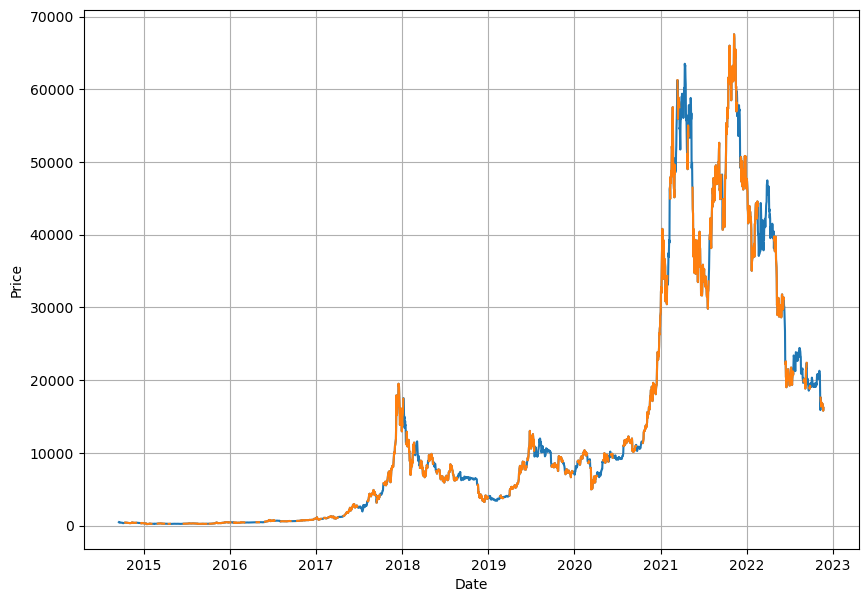

In [51]:
data['trend'] = np.where(data.adx>25,data['Adj Close'],np.nan)

data['trend_signal'] = np.where(data.adx>25,1,0)
plt.figure(figsize=(10,7))
plt.grid()
plt.plot(data['Adj Close'])
plt.plot(data['trend'])
plt.ylabel('Price')
plt.xlabel('Date')


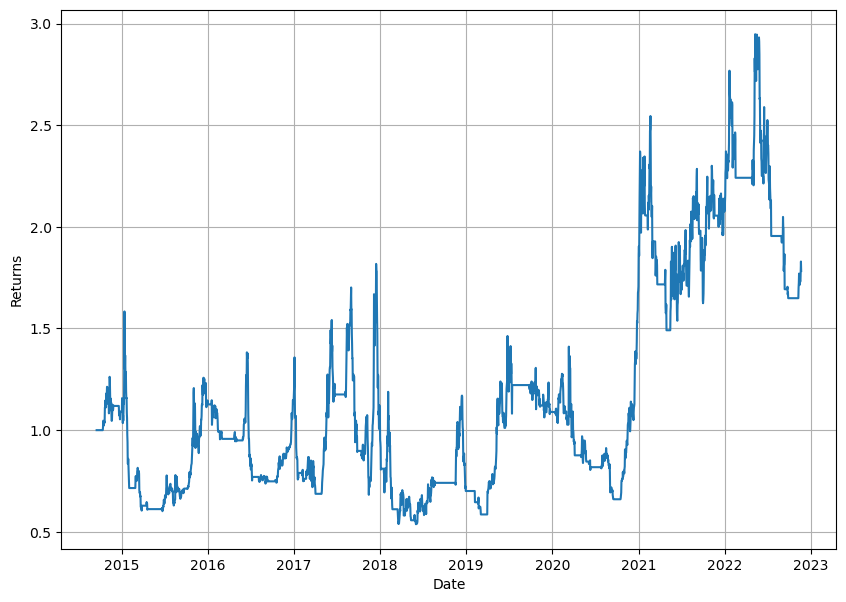

In [52]:
data['direction'] = np.where(data.adx_pos_directional_indicator>data.adx_neg_directional_indicator,1,-1) * data['trend_signal']
data['daily_returns'] = data['Adj Close'].pct_change()
data['strategy_returns'] = data.daily_returns.shift(-1) * data.direction
plot_graph((data['strategy_returns']+1).cumprod(), 'Returns', 'Date')

#  Average True Range (ATR): Measures

In [53]:
high_low = data['High'] - data['Low']
high_close = np.abs(data['High'] - data['Close'].shift())
low_close = np.abs(data['Low'] - data['Close'].shift())
ranges = pd.concat([high_low, high_close, low_close], axis=1)
true_range = np.max(ranges, axis=1)
data['atr'] = true_range.rolling(14).sum()/14


In [54]:
data

,Open,High,Low,Close,Adj Close,Volume,dateFormatted,MoneyFlowVolume,acc_dist_indicator,aroon_up,aroon_down,aroon_oscillator,Adj Open,Adj High,Adj Low,adx_pos_directional_indicator,adx_neg_directional_indicator,adx,trend,trend_signal,direction,daily_returns,strategy_returns,atr
Date,,,,,,,,,,,,,,,,,,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,17sep2014,-7.924336e+06,-7.924336e+06,NaN,NaN,NaN,465.864014,468.174011,452.421997,0.000000,0.000000,0.000000,NaN,0,0,NaN,-0.000000,NaN
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,18sep2014,-1.661586e+07,-2.454020e+07,NaN,NaN,NaN,456.859985,456.859985,413.104004,0.000000,0.000000,0.000000,NaN,0,0,-0.071926,-0.000000,NaN
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,19sep2014,-1.994371e+07,-4.448391e+07,NaN,NaN,NaN,424.102997,427.834991,384.532013,0.000000,0.000000,0.000000,NaN,0,0,-0.069843,0.000000,NaN
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,20sep2014,5.107041e+06,-3.937687e+07,NaN,NaN,NaN,394.673004,423.295990,389.882996,0.000000,0.000000,0.000000,NaN,0,0,0.035735,-0.000000,NaN
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,21sep2014,-1.100076e+07,-5.037763e+07,NaN,NaN,NaN,408.084991,412.425995,393.181000,0.000000,0.000000,0.000000,NaN,0,0,-0.024659,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-18 00:00:00+00:00,16687.912109,16947.058594,16564.611328,16697.777344,16697.777344,26862218609,18nov2022,-8.155668e+09,4.006859e+12,48.0,64.0,-16.0,16687.912109,16947.058594,16564.611328,10.126249,33.000040,39.869414,16697.777344,1,-1,0.000615,-0.000825,1040.964844
2022-11-19 00:00:00+00:00,16696.220703,16797.876953,16570.410156,16711.546875,16711.546875,16106223492,19nov2022,3.880689e+09,4.010740e+12,44.0,60.0,-16.0,16696.220703,16797.876953,16570.410156,9.910023,32.295389,40.810105,16711.546875,1,-1,0.000825,0.025115,1032.265904
2022-11-20 00:00:00+00:00,16712.919922,16746.779297,16248.692383,16291.832031,16291.832031,21313378652,20nov2022,-1.762145e+10,3.993118e+12,40.0,56.0,-16.0,16712.919922,16746.779297,16248.692383,9.434939,33.843618,41.923598,16291.832031,1,-1,-0.025115,0.030969,1037.473145


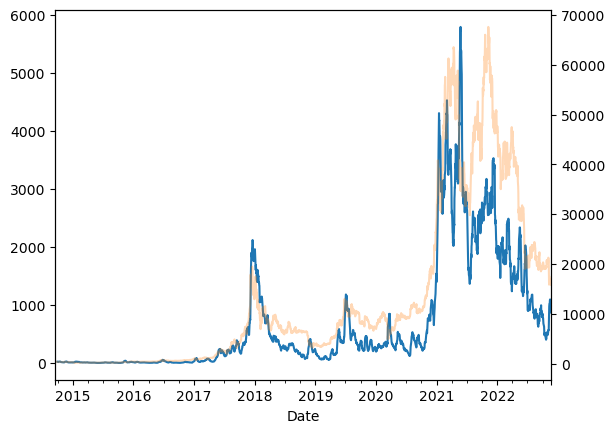

In [55]:
# Visualize the ATR and the stock price

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
data['atr'].plot(ax=ax)
data['Close'].plot(ax=ax, secondary_y=True, alpha=0.3)
plt.show()

# %B Indicator: Shows the relationship

Calculating SMA values: In this part, we are going to calculate the SMA values with the number of periods as 20.

In [56]:
def sma(data, window):
    sma = data.rolling(window = window).mean()
    return sma

data['sma_20'] = sma(data['Close'], 20)
data.tail()

,Open,High,Low,Close,Adj Close,Volume,dateFormatted,MoneyFlowVolume,acc_dist_indicator,aroon_up,aroon_down,aroon_oscillator,Adj Open,Adj High,Adj Low,adx_pos_directional_indicator,adx_neg_directional_indicator,adx,trend,trend_signal,direction,daily_returns,strategy_returns,atr,sma_20
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2022-11-18 00:00:00+00:00,16687.912109,16947.058594,16564.611328,16697.777344,16697.777344,26862218609,18nov2022,-8.155668e+09,4.006859e+12,48.0,64.0,-16.0,16687.912109,16947.058594,16564.611328,10.126249,33.000040,39.869414,16697.777344,1,-1,0.000615,-0.000825,1040.964844,18584.929053
2022-11-19 00:00:00+00:00,16696.220703,16797.876953,16570.410156,16711.546875,16711.546875,16106223492,19nov2022,3.880689e+09,4.010740e+12,44.0,60.0,-16.0,16696.220703,16797.876953,16570.410156,9.910023,32.295389,40.810105,16711.546875,1,-1,0.000825,0.025115,1032.265904,18388.726221
2022-11-20 00:00:00+00:00,16712.919922,16746.779297,16248.692383,16291.832031,16291.832031,21313378652,20nov2022,-1.762145e+10,3.993118e+12,40.0,56.0,-16.0,16712.919922,16746.779297,16248.692383,9.434939,33.843618,41.923598,16291.832031,1,-1,-0.025115,0.030969,1037.473145,18178.529150
2022-11-21 00:00:00+00:00,16291.223633,16291.223633,15599.046875,15787.284180,15787.284180,37429485518,21nov2022,-1.707161e+10,3.976047e+12,36.0,100.0,-64.0,16291.223633,16291.223633,15599.046875,8.802824,37.858721,43.376875,15787.284180,1,-1,-0.030969,-0.025494,1046.723982,17943.629688
2022-11-22 00:00:00+00:00,15782.300781,16253.047852,15656.606445,16189.769531,16189.769531,30726828760,22nov2022,2.420702e+10,4.000254e+12,32.0,96.0,-64.0,15782.300781,16253.047852,15656.606445,8.287998,35.644585,44.726346,16189.769531,1,-1,0.025494,NaN,870.679618,17745.142969


Calculating Bollinger Bands: In this part, we are going to calculate the Bollinger Bands values of Tesla using the SMA values which we have created earlier.

In [57]:
def bb(data, sma, window):
    std = data.rolling(window = window).std()
    upper_bb = sma + std * 2
    lower_bb = sma - std * 2
    return upper_bb, lower_bb

data['upper_bb'], data['lower_bb'] = bb(data['Close'], data['sma_20'], 20)
data.tail()

,Open,High,Low,Close,Adj Close,Volume,dateFormatted,MoneyFlowVolume,acc_dist_indicator,aroon_up,aroon_down,aroon_oscillator,Adj Open,Adj High,Adj Low,adx_pos_directional_indicator,adx_neg_directional_indicator,adx,trend,trend_signal,direction,daily_returns,strategy_returns,atr,sma_20,upper_bb,lower_bb
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-11-18 00:00:00+00:00,16687.912109,16947.058594,16564.611328,16697.777344,16697.777344,26862218609,18nov2022,-8.155668e+09,4.006859e+12,48.0,64.0,-16.0,16687.912109,16947.058594,16564.611328,10.126249,33.000040,39.869414,16697.777344,1,-1,0.000615,-0.000825,1040.964844,18584.929053,22597.007159,14572.850947
2022-11-19 00:00:00+00:00,16696.220703,16797.876953,16570.410156,16711.546875,16711.546875,16106223492,19nov2022,3.880689e+09,4.010740e+12,44.0,60.0,-16.0,16696.220703,16797.876953,16570.410156,9.910023,32.295389,40.810105,16711.546875,1,-1,0.000825,0.025115,1032.265904,18388.726221,22362.165536,14415.286905
2022-11-20 00:00:00+00:00,16712.919922,16746.779297,16248.692383,16291.832031,16291.832031,21313378652,20nov2022,-1.762145e+10,3.993118e+12,40.0,56.0,-16.0,16712.919922,16746.779297,16248.692383,9.434939,33.843618,41.923598,16291.832031,1,-1,-0.025115,0.030969,1037.473145,18178.529150,22127.351921,14229.706379
2022-11-21 00:00:00+00:00,16291.223633,16291.223633,15599.046875,15787.284180,15787.284180,37429485518,21nov2022,-1.707161e+10,3.976047e+12,36.0,100.0,-64.0,16291.223633,16291.223633,15599.046875,8.802824,37.858721,43.376875,15787.284180,1,-1,-0.030969,-0.025494,1046.723982,17943.629688,21873.572347,14013.687028
2022-11-22 00:00:00+00:00,15782.300781,16253.047852,15656.606445,16189.769531,16189.769531,30726828760,22nov2022,2.420702e+10,4.000254e+12,32.0,96.0,-64.0,15782.300781,16253.047852,15656.606445,8.287998,35.644585,44.726346,16189.769531,1,-1,0.025494,NaN,870.679618,17745.142969,21604.216257,13886.069680


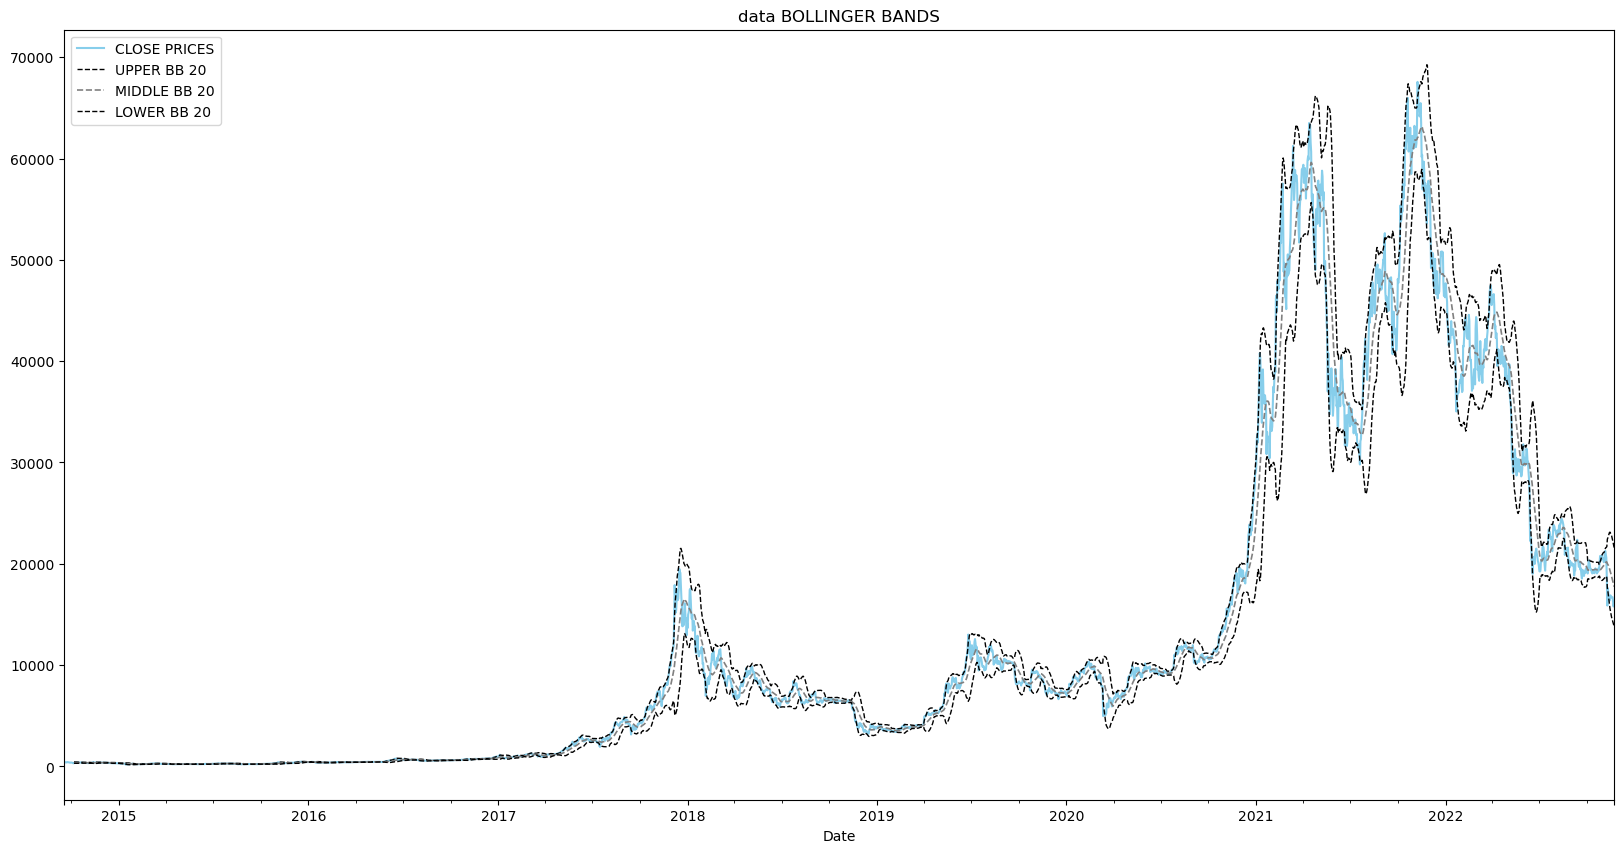

In [58]:
plt.figure(figsize=(20,10))
data['Close'].plot(label = 'CLOSE PRICES', color = 'skyblue')
data['upper_bb'].plot(label = 'UPPER BB 20', linestyle = '--', linewidth = 1, color = 'black')
data['sma_20'].plot(label = 'MIDDLE BB 20', linestyle = '--', linewidth = 1.2, color = 'grey')
data['lower_bb'].plot(label = 'LOWER BB 20', linestyle = '--', linewidth = 1, color = 'black')
plt.legend(loc = 'upper left')
plt.title('data BOLLINGER BANDS')
plt.show()

# Chaikin Money Flow (CMF):

In [59]:

def calculate_money_flow_volume_series(df: pd.DataFrame) -> pd.Series:
    """
    Calculates money flow series
    """
    mfv = df['Volume'] * (2*df['Close'] - df['High'] - df['Low']) / \
                                    (df['High'] - df['Low'])
    return mfv

def calculate_money_flow_volume(df: pd.DataFrame, n: int=21) -> pd.Series:
    """
    Calculates money flow volume, or q_t in our formula
    """
    return calculate_money_flow_volume_series(df).rolling(n).sum()

def calculate_chaikin_money_flow(df: pd.DataFrame, n: int=20) -> pd.Series:
    """
    Calculates the Chaikin money flow
    """
    return calculate_money_flow_volume(df, n) / df['Volume'].rolling(n).sum()


data.set_index('Date',inplace=True)


<AxesSubplot:xlabel='Date'>

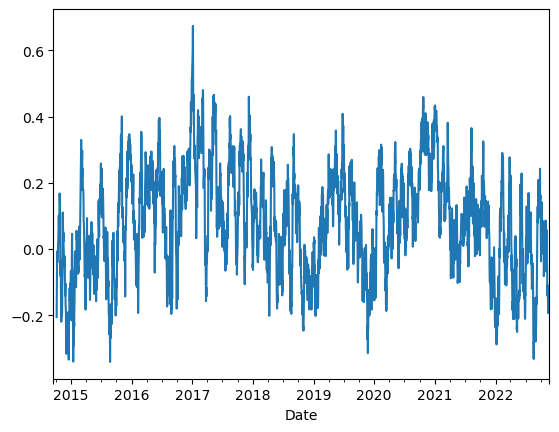

In [60]:

data['cmf'] = calculate_chaikin_money_flow(data)
data['cmf'].plot()

In [61]:
data

,Open,High,Low,Close,Adj Close,Volume,dateFormatted,MoneyFlowVolume,acc_dist_indicator,aroon_up,aroon_down,aroon_oscillator,Adj Open,Adj High,Adj Low,adx_pos_directional_indicator,adx_neg_directional_indicator,adx,trend,trend_signal,direction,daily_returns,strategy_returns,atr,sma_20,upper_bb,lower_bb,cmf
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,17sep2014,-7.924336e+06,-7.924336e+06,NaN,NaN,NaN,465.864014,468.174011,452.421997,0.000000,0.000000,0.000000,NaN,0,0,NaN,-0.000000,NaN,NaN,NaN,NaN,NaN
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,18sep2014,-1.661586e+07,-2.454020e+07,NaN,NaN,NaN,456.859985,456.859985,413.104004,0.000000,0.000000,0.000000,NaN,0,0,-0.071926,-0.000000,NaN,NaN,NaN,NaN,NaN
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,19sep2014,-1.994371e+07,-4.448391e+07,NaN,NaN,NaN,424.102997,427.834991,384.532013,0.000000,0.000000,0.000000,NaN,0,0,-0.069843,0.000000,NaN,NaN,NaN,NaN,NaN
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,20sep2014,5.107041e+06,-3.937687e+07,NaN,NaN,NaN,394.673004,423.295990,389.882996,0.000000,0.000000,0.000000,NaN,0,0,0.035735,-0.000000,NaN,NaN,NaN,NaN,NaN
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,21sep2014,-1.100076e+07,-5.037763e+07,NaN,NaN,NaN,408.084991,412.425995,393.181000,0.000000,0.000000,0.000000,NaN,0,0,-0.024659,0.000000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-18 00:00:00+00:00,16687.912109,16947.058594,16564.611328,16697.777344,16697.777344,26862218609,18nov2022,-8.155668e+09,4.006859e+12,48.0,64.0,-16.0,16687.912109,16947.058594,16564.611328,10.126249,33.000040,39.869414,16697.777344,1,-1,0.000615,-0.000825,1040.964844,18584.929053,22597.007159,14572.850947,-0.182863
2022-11-19 00:00:00+00:00,16696.220703,16797.876953,16570.410156,16711.546875,16711.546875,16106223492,19nov2022,3.880689e+09,4.010740e+12,44.0,60.0,-16.0,16696.220703,16797.876953,16570.410156,9.910023,32.295389,40.810105,16711.546875,1,-1,0.000825,0.025115,1032.265904,18388.726221,22362.165536,14415.286905,-0.165037
2022-11-20 00:00:00+00:00,16712.919922,16746.779297,16248.692383,16291.832031,16291.832031,21313378652,20nov2022,-1.762145e+10,3.993118e+12,40.0,56.0,-16.0,16712.919922,16746.779297,16248.692383,9.434939,33.843618,41.923598,16291.832031,1,-1,-0.025115,0.030969,1037.473145,18178.529150,22127.351921,14229.706379,-0.179044


# Chaikin Oscillator

In [62]:
def chaikin_oscillator(data, periods_short=3, periods_long=10, high_col='High',
                       low_col='Low', close_col='Close', vol_col='Volume'):
    ac = []
    val_last = 0

    for index, row in data.iterrows():
        if row[high_col] != row[low_col]:
            val = val_last + ((row[close_col] - row[low_col]) - (row[high_col] - row[close_col])) / (row[high_col] - row[low_col]) * row[vol_col]
        else:
            val = val_last
        ac.append(val)
        val_last = val
    #print(ac)
    ac=pd.Series(ac)
    ema_long = ac.ewm(ignore_na=False, min_periods=0, com=periods_long, adjust=True).mean()
    ema_short = ac.ewm(ignore_na=False, min_periods=0, com=periods_short, adjust=True).mean()
    #print("long is",ema_long)
    #print("long is",ema_short)
    
    ch_osc = ema_short - ema_long
    #print(ch_osc)
    return ch_osc

In [63]:
chaikin_oscillator(data)

0       0.000000e+00
1      -7.912314e+05
2      -2.311908e+06
3      -2.458149e+06
4      -3.408523e+06
            ...     
2984   -4.351841e+10
2985   -3.909495e+10
2986   -3.799384e+10
2987   -3.909553e+10
2988   -3.510703e+10
Length: 2989, dtype: float64

In [64]:
data['ch_osc']=chaikin_oscillator(data)

In [65]:
data['ch_osc']

Date
2014-09-17 00:00:00+00:00   NaN
2014-09-18 00:00:00+00:00   NaN
2014-09-19 00:00:00+00:00   NaN
2014-09-20 00:00:00+00:00   NaN
2014-09-21 00:00:00+00:00   NaN
                             ..
2022-11-18 00:00:00+00:00   NaN
2022-11-19 00:00:00+00:00   NaN
2022-11-20 00:00:00+00:00   NaN
2022-11-21 00:00:00+00:00   NaN
2022-11-22 00:00:00+00:00   NaN
Name: ch_osc, Length: 2989, dtype: float64

# Commodity Channel Index (CCI):

Compute the Commodity Channel Index (CCI) based on the 14-day moving average


In [66]:
def CCI(df, ndays): 
    df['TP'] = (data['High'] + data['Low'] + data['Close']) / 3 
    df['sma'] = df['TP'].rolling(ndays).mean()
    df['mad'] = df['TP'].rolling(ndays).apply(lambda x: pd.Series(x).mad())
    df['CCI'] = (df['TP'] - df['sma']) / (0.015 * df['mad']) 
    return df

data = CCI(data,14)

In [67]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,dateFormatted,MoneyFlowVolume,acc_dist_indicator,aroon_up,aroon_down,aroon_oscillator,Adj Open,Adj High,Adj Low,adx_pos_directional_indicator,adx_neg_directional_indicator,adx,trend,trend_signal,direction,daily_returns,strategy_returns,atr,sma_20,upper_bb,lower_bb,cmf,ch_osc,TP,sma,mad,CCI
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-11-18 00:00:00+00:00,16687.912109,16947.058594,16564.611328,16697.777344,16697.777344,26862218609,18nov2022,-8.155668e+09,4.006859e+12,48.0,64.0,-16.0,16687.912109,16947.058594,16564.611328,10.126249,33.000040,39.869414,16697.777344,1,-1,0.000615,-0.000825,1040.964844,18584.929053,22597.007159,14572.850947,-0.182863,NaN,16736.482422,17837.343029,1520.314772,-48.273363
2022-11-19 00:00:00+00:00,16696.220703,16797.876953,16570.410156,16711.546875,16711.546875,16106223492,19nov2022,3.880689e+09,4.010740e+12,44.0,60.0,-16.0,16696.220703,16797.876953,16570.410156,9.910023,32.295389,40.810105,16711.546875,1,-1,0.000825,0.025115,1032.265904,18388.726221,22362.165536,14415.286905,-0.165037,NaN,16693.277995,17510.024484,1169.394920,-46.562342
2022-11-20 00:00:00+00:00,16712.919922,16746.779297,16248.692383,16291.832031,16291.832031,21313378652,20nov2022,-1.762145e+10,3.993118e+12,40.0,56.0,-16.0,16712.919922,16746.779297,16248.692383,9.434939,33.843618,41.923598,16291.832031,1,-1,-0.025115,0.030969,1037.473145,18178.529150,22127.351921,14229.706379,-0.179044,NaN,16429.101237,17178.958984,756.271670,-66.101268
2022-11-21 00:00:00+00:00,16291.223633,16291.223633,15599.046875,15787.284180,15787.284180,37429485518,21nov2022,-1.707161e+10,3.976047e+12,36.0,100.0,-64.0,16291.223633,16291.223633,15599.046875,8.802824,37.858721,43.376875,15787.284180,1,-1,-0.030969,-0.025494,1046.723982,17943.629688,21873.572347,14013.687028,-0.192034,NaN,15892.518229,16834.471354,381.772647,-164.487622
2022-11-22 00:00:00+00:00,15782.300781,16253.047852,15656.606445,16189.769531,16189.769531,30726828760,22nov2022,2.420702e+10,4.000254e+12,32.0,96.0,-64.0,15782.300781,16253.047852,15656.606445,8.287998,35.644585,44.726346,16189.769531,1,-1,0.025494,NaN,870.679618,17745.142969,21604.216257,13886.069680,-0.124736,NaN,16033.141276,16627.090402,245.403520,-161.353058


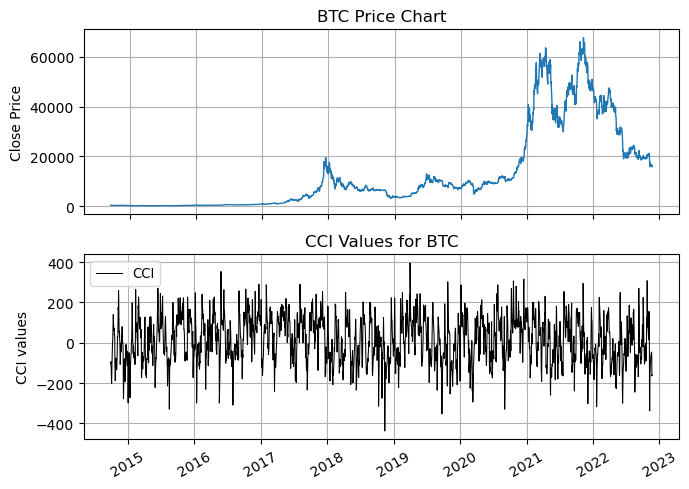

In [68]:
# Plot the price series chart and the Commodity Channel index
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(2, 1, 1)
ax.set_xticklabels([])
plt.plot(data['Close'],lw=1)
plt.title('BTC Price Chart')
plt.ylabel('Close Price')
plt.grid(True)
bx = fig.add_subplot(2, 1, 2)
plt.plot(data['CCI'],'k',lw=0.75,linestyle='-',label='CCI')
plt.title('CCI Values for BTC')
plt.legend(loc=2,prop={'size':9.5})
plt.ylabel('CCI values')
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
plt.tight_layout()
plt.show()

# Coppock Curve

In [69]:

def wma(data, lookback):
    weights = np.arange(1, lookback + 1)
    val = data.rolling(lookback)
    wma = val.apply(lambda prices: np.dot(prices, weights) / weights.sum(), raw = True)
    return wma

def get_roc(close, n):
    difference = close.diff(n)
    nprev_values = close.shift(n)
    roc = (difference / nprev_values) * 100
    return roc

def get_cc(data, roc1_n, roc2_n, wma_lookback):
    longROC = get_roc(data, roc1_n)
    shortROC = get_roc(data, roc2_n)
    ROC = longROC + shortROC
    cc = wma(ROC, wma_lookback)
    return cc

data['cc'] = get_cc(data['Close'], 14, 11, 10)
data.tail()

,Open,High,Low,Close,Adj Close,Volume,dateFormatted,MoneyFlowVolume,acc_dist_indicator,aroon_up,aroon_down,aroon_oscillator,Adj Open,Adj High,Adj Low,adx_pos_directional_indicator,adx_neg_directional_indicator,adx,trend,trend_signal,direction,daily_returns,strategy_returns,atr,sma_20,upper_bb,lower_bb,cmf,ch_osc,TP,sma,mad,CCI,cc
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-11-18 00:00:00+00:00,16687.912109,16947.058594,16564.611328,16697.777344,16697.777344,26862218609,18nov2022,-8.155668e+09,4.006859e+12,48.0,64.0,-16.0,16687.912109,16947.058594,16564.611328,10.126249,33.000040,39.869414,16697.777344,1,-1,0.000615,-0.000825,1040.964844,18584.929053,22597.007159,14572.850947,-0.182863,NaN,16736.482422,17837.343029,1520.314772,-48.273363,-37.974943
2022-11-19 00:00:00+00:00,16696.220703,16797.876953,16570.410156,16711.546875,16711.546875,16106223492,19nov2022,3.880689e+09,4.010740e+12,44.0,60.0,-16.0,16696.220703,16797.876953,16570.410156,9.910023,32.295389,40.810105,16711.546875,1,-1,0.000825,0.025115,1032.265904,18388.726221,22362.165536,14415.286905,-0.165037,NaN,16693.277995,17510.024484,1169.394920,-46.562342,-36.809894
2022-11-20 00:00:00+00:00,16712.919922,16746.779297,16248.692383,16291.832031,16291.832031,21313378652,20nov2022,-1.762145e+10,3.993118e+12,40.0,56.0,-16.0,16712.919922,16746.779297,16248.692383,9.434939,33.843618,41.923598,16291.832031,1,-1,-0.025115,0.030969,1037.473145,18178.529150,22127.351921,14229.706379,-0.179044,NaN,16429.101237,17178.958984,756.271670,-66.101268,-33.790956
2022-11-21 00:00:00+00:00,16291.223633,16291.223633,15599.046875,15787.284180,15787.284180,37429485518,21nov2022,-1.707161e+10,3.976047e+12,36.0,100.0,-64.0,16291.223633,16291.223633,15599.046875,8.802824,37.858721,43.376875,15787.284180,1,-1,-0.030969,-0.025494,1046.723982,17943.629688,21873.572347,14013.687028,-0.192034,NaN,15892.518229,16834.471354,381.772647,-164.487622,-33.480810
2022-11-22 00:00:00+00:00,15782.300781,16253.047852,15656.606445,16189.769531,16189.769531,30726828760,22nov2022,2.420702e+10,4.000254e+12,32.0,96.0,-64.0,15782.300781,16253.047852,15656.606445,8.287998,35.644585,44.726346,16189.769531,1,-1,0.025494,NaN,870.679618,17745.142969,21604.216257,13886.069680,-0.124736,NaN,16033.141276,16627.090402,245.403520,-161.353058,-30.278391


# Ease of Movement (EMV)

In [70]:
def EMV(data, ndays): 
    dm = ((data['High'] + data['Low'])/2) - ((data['High'].shift(1) + data['Low'].shift(1))/2)
    br = (data['Volume'] / 100000000) / ((data['High'] - data['Low']))
    EMV = dm / br 
    EMV_MA = pd.Series(EMV.rolling(ndays).mean(), name = 'EMV') 
    #data = data.join(EMV_MA) 
    return EMV,EMV_MA
    

n = 14
data['EMV'],data['EMV_MA']=EMV(data, n)

In [71]:
#from ta.volume import EaseOfMovementIndicator as EM

In [72]:
#emv = EM(data['High'],data['Low'],data['Volume'],14)
#emv.ease_of_movement()

In [73]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,dateFormatted,MoneyFlowVolume,acc_dist_indicator,aroon_up,aroon_down,aroon_oscillator,Adj Open,Adj High,Adj Low,adx_pos_directional_indicator,adx_neg_directional_indicator,adx,trend,trend_signal,direction,daily_returns,strategy_returns,atr,sma_20,upper_bb,lower_bb,cmf,ch_osc,TP,sma,mad,CCI,cc,EMV,EMV_MA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-11-18 00:00:00+00:00,16687.912109,16947.058594,16564.611328,16697.777344,16697.777344,26862218609,18nov2022,-8.155668e+09,4.006859e+12,48.0,64.0,-16.0,16687.912109,16947.058594,16564.611328,10.126249,33.000040,39.869414,16697.777344,1,-1,0.000615,-0.000825,1040.964844,18584.929053,22597.007159,14572.850947,-0.182863,NaN,16736.482422,17837.343029,1520.314772,-48.273363,-37.974943,231.034649,-776.239751
2022-11-19 00:00:00+00:00,16696.220703,16797.876953,16570.410156,16711.546875,16711.546875,16106223492,19nov2022,3.880689e+09,4.010740e+12,44.0,60.0,-16.0,16696.220703,16797.876953,16570.410156,9.910023,32.295389,40.810105,16711.546875,1,-1,0.000825,0.025115,1032.265904,18388.726221,22362.165536,14415.286905,-0.165037,NaN,16693.277995,17510.024484,1169.394920,-46.562342,-36.809894,-101.249151,-821.272678
2022-11-20 00:00:00+00:00,16712.919922,16746.779297,16248.692383,16291.832031,16291.832031,21313378652,20nov2022,-1.762145e+10,3.993118e+12,40.0,56.0,-16.0,16712.919922,16746.779297,16248.692383,9.434939,33.843618,41.923598,16291.832031,1,-1,-0.025115,0.030969,1037.473145,18178.529150,22127.351921,14229.706379,-0.179044,NaN,16429.101237,17178.958984,756.271670,-66.101268,-33.790956,-435.628930,-840.314819
2022-11-21 00:00:00+00:00,16291.223633,16291.223633,15599.046875,15787.284180,15787.284180,37429485518,21nov2022,-1.707161e+10,3.976047e+12,36.0,100.0,-64.0,16291.223633,16291.223633,15599.046875,8.802824,37.858721,43.376875,15787.284180,1,-1,-0.030969,-0.025494,1046.723982,17943.629688,21873.572347,14013.687028,-0.192034,NaN,15892.518229,16834.471354,381.772647,-164.487622,-33.480810,-1021.914345,-886.152638
2022-11-22 00:00:00+00:00,15782.300781,16253.047852,15656.606445,16189.769531,16189.769531,30726828760,22nov2022,2.420702e+10,4.000254e+12,32.0,96.0,-64.0,15782.300781,16253.047852,15656.606445,8.287998,35.644585,44.726346,16189.769531,1,-1,0.025494,NaN,870.679618,17745.142969,21604.216257,13886.069680,-0.124736,NaN,16033.141276,16627.090402,245.403520,-161.353058,-30.278391,18.813029,-583.913960


# Force Index

In [74]:
def ForceIndex(data, ndays): 
    FI = pd.Series(data['Close'].diff(ndays) * data['Volume'], name = 'ForceIndex')  
    return FI


data['ForceIndex']=ForceIndex(data,15)

In [75]:
data

,Open,High,Low,Close,Adj Close,Volume,dateFormatted,MoneyFlowVolume,acc_dist_indicator,aroon_up,aroon_down,aroon_oscillator,Adj Open,Adj High,Adj Low,adx_pos_directional_indicator,adx_neg_directional_indicator,adx,trend,trend_signal,direction,daily_returns,strategy_returns,atr,sma_20,upper_bb,lower_bb,cmf,ch_osc,TP,sma,mad,CCI,cc,EMV,EMV_MA,ForceIndex
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,17sep2014,-7.924336e+06,-7.924336e+06,NaN,NaN,NaN,465.864014,468.174011,452.421997,0.000000,0.000000,0.000000,NaN,0,0,NaN,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,459.310008,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,18sep2014,-1.661586e+07,-2.454020e+07,NaN,NaN,NaN,456.859985,456.859985,413.104004,0.000000,0.000000,0.000000,NaN,0,0,-0.071926,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,431.467997,NaN,NaN,NaN,NaN,-3212.366726,NaN,NaN
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,19sep2014,-1.994371e+07,-4.448391e+07,NaN,NaN,NaN,424.102997,427.834991,384.532013,0.000000,0.000000,0.000000,NaN,0,0,-0.069843,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,402.387665,NaN,NaN,NaN,NaN,-3288.687672,NaN,NaN
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,20sep2014,5.107041e+06,-3.937687e+07,NaN,NaN,NaN,394.673004,423.295990,389.882996,0.000000,0.000000,0.000000,NaN,0,0,0.035735,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,407.360992,NaN,NaN,NaN,NaN,36.798798,NaN,NaN
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,21sep2014,-1.100076e+07,-5.037763e+07,NaN,NaN,NaN,408.084991,412.425995,393.181000,0.000000,0.000000,0.000000,NaN,0,0,-0.024659,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,401.476003,NaN,NaN,NaN,NaN,-274.120355,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-18 00:00:00+00:00,16687.912109,16947.058594,16564.611328,16697.777344,16697.777344,26862218609,18nov2022,-8.155668e+09,4.006859e+12,48.0,64.0,-16.0,16687.912109,16947.058594,16564.611328,10.126249,33.000040,39.869414,16697.777344,1,-1,0.000615,-0.000825,1040.964844,18584.929053,22597.007159,14572.850947,-0.182863,NaN,16736.482422,17837.343029,1520.314772,-48.273363,-37.974943,231.034649,-776.239751,-9.434578e+13
2022-11-19 00:00:00+00:00,16696.220703,16797.876953,16570.410156,16711.546875,16711.546875,16106223492,19nov2022,3.880689e+09,4.010740e+12,44.0,60.0,-16.0,16696.220703,16797.876953,16570.410156,9.910023,32.295389,40.810105,16711.546875,1,-1,0.000825,0.025115,1032.265904,18388.726221,22362.165536,14415.286905,-0.165037,NaN,16693.277995,17510.024484,1169.394920,-46.562342,-36.809894,-101.249151,-821.272678,-7.144211e+13
2022-11-20 00:00:00+00:00,16712.919922,16746.779297,16248.692383,16291.832031,16291.832031,21313378652,20nov2022,-1.762145e+10,3.993118e+12,40.0,56.0,-16.0,16712.919922,16746.779297,16248.692383,9.434939,33.843618,41.923598,16291.832031,1,-1,-0.025115,0.030969,1037.473145,18178.529150,22127.351921,14229.706379,-0.179044,NaN,16429.101237,17178.958984,756.271670,-66.101268,-33.790956,-435.628930,-840.314819,-1.063721e+14


# Mass Index

In [76]:
data.reset_index(inplace=True)

In [77]:
def mass_index(data, period=25, ema_period=9, high_col='High', low_col='Low'):
    high_low = data[high_col] - data[low_col] + 0.000001	#this is to avoid division by zero below
    ema = high_low.ewm(ignore_na=False, min_periods=0, com=ema_period, adjust=True).mean()
    ema_ema = ema.ewm(ignore_na=False, min_periods=0, com=ema_period, adjust=True).mean()
    div = ema / ema_ema
    mi=[]

    for index, row in data.iterrows():
        if index >= period:
            val = div[index-25:index].sum()
        else:
            val = 0
        mi.append(val)
         
    return mi
 
data['mass_index']=mass_index(data)      

In [78]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,dateFormatted,MoneyFlowVolume,acc_dist_indicator,aroon_up,aroon_down,aroon_oscillator,Adj Open,Adj High,Adj Low,adx_pos_directional_indicator,adx_neg_directional_indicator,adx,trend,trend_signal,direction,daily_returns,strategy_returns,atr,sma_20,upper_bb,lower_bb,cmf,ch_osc,TP,sma,mad,CCI,cc,EMV,EMV_MA,ForceIndex,mass_index
2984,2022-11-18 00:00:00+00:00,16687.912109,16947.058594,16564.611328,16697.777344,16697.777344,26862218609,18nov2022,-8.155668e+09,4.006859e+12,48.0,64.0,-16.0,16687.912109,16947.058594,16564.611328,10.126249,33.000040,39.869414,16697.777344,1,-1,0.000615,-0.000825,1040.964844,18584.929053,22597.007159,14572.850947,-0.182863,NaN,16736.482422,17837.343029,1520.314772,-48.273363,-37.974943,231.034649,-776.239751,-9.434578e+13,28.179540
2985,2022-11-19 00:00:00+00:00,16696.220703,16797.876953,16570.410156,16711.546875,16711.546875,16106223492,19nov2022,3.880689e+09,4.010740e+12,44.0,60.0,-16.0,16696.220703,16797.876953,16570.410156,9.910023,32.295389,40.810105,16711.546875,1,-1,0.000825,0.025115,1032.265904,18388.726221,22362.165536,14415.286905,-0.165037,NaN,16693.277995,17510.024484,1169.394920,-46.562342,-36.809894,-101.249151,-821.272678,-7.144211e+13,28.367826
2986,2022-11-20 00:00:00+00:00,16712.919922,16746.779297,16248.692383,16291.832031,16291.832031,21313378652,20nov2022,-1.762145e+10,3.993118e+12,40.0,56.0,-16.0,16712.919922,16746.779297,16248.692383,9.434939,33.843618,41.923598,16291.832031,1,-1,-0.025115,0.030969,1037.473145,18178.529150,22127.351921,14229.706379,-0.179044,NaN,16429.101237,17178.958984,756.271670,-66.101268,-33.790956,-435.628930,-840.314819,-1.063721e+14,28.369759
2987,2022-11-21 00:00:00+00:00,16291.223633,16291.223633,15599.046875,15787.284180,15787.284180,37429485518,21nov2022,-1.707161e+10,3.976047e+12,36.0,100.0,-64.0,16291.223633,16291.223633,15599.046875,8.802824,37.858721,43.376875,15787.284180,1,-1,-0.030969,-0.025494,1046.723982,17943.629688,21873.572347,14013.687028,-0.192034,NaN,15892.518229,16834.471354,381.772647,-164.487622,-33.480810,-1021.914345,-886.152638,-1.923577e+14,28.285070
2988,2022-11-22 00:00:00+00:00,15782.300781,16253.047852,15656.606445,16189.769531,16189.769531,30726828760,22nov2022,2.420702e+10,4.000254e+12,32.0,96.0,-64.0,15782.300781,16253.047852,15656.606445,8.287998,35.644585,44.726346,16189.769531,1,-1,0.025494,NaN,870.679618,17745.142969,21604.216257,13886.069680,-0.124736,NaN,16033.141276,16627.090402,245.403520,-161.353058,-30.278391,18.813029,-583.913960,-1.355989e+14,28.195364


# macd

In [79]:

def get_macd(price, slow, fast, smooth):
    exp1 = price.ewm(span = fast, adjust = False).mean()
    exp2 = price.ewm(span = slow, adjust = False).mean()
    macd = pd.DataFrame(exp1 - exp2).rename(columns = {'Close':'macd'})
    signal = pd.DataFrame(macd.ewm(span = smooth, adjust = False).mean()).rename(columns = {'macd':'signal'})
    hist = pd.DataFrame(macd['macd'] - signal['signal']).rename(columns = {0:'hist'})
    frames =  [macd, signal, hist]
    #df = pd.concat(frames, join = 'inner', axis = 1)
    return macd,signal,hist

data['macd'],data['signal'],data['hist'] = get_macd(data['Close'], 26, 12, 9)
data.tail()


,Date,Open,High,Low,Close,Adj Close,Volume,dateFormatted,MoneyFlowVolume,acc_dist_indicator,aroon_up,aroon_down,aroon_oscillator,Adj Open,Adj High,Adj Low,adx_pos_directional_indicator,adx_neg_directional_indicator,adx,trend,trend_signal,direction,daily_returns,strategy_returns,atr,sma_20,upper_bb,lower_bb,cmf,ch_osc,TP,sma,mad,CCI,cc,EMV,EMV_MA,ForceIndex,mass_index,macd,signal,hist
2984,2022-11-18 00:00:00+00:00,16687.912109,16947.058594,16564.611328,16697.777344,16697.777344,26862218609,18nov2022,-8.155668e+09,4.006859e+12,48.0,64.0,-16.0,16687.912109,16947.058594,16564.611328,10.126249,33.000040,39.869414,16697.777344,1,-1,0.000615,-0.000825,1040.964844,18584.929053,22597.007159,14572.850947,-0.182863,NaN,16736.482422,17837.343029,1520.314772,-48.273363,-37.974943,231.034649,-776.239751,-9.434578e+13,28.179540,-905.266059,-693.326054,-211.940005
2985,2022-11-19 00:00:00+00:00,16696.220703,16797.876953,16570.410156,16711.546875,16711.546875,16106223492,19nov2022,3.880689e+09,4.010740e+12,44.0,60.0,-16.0,16696.220703,16797.876953,16570.410156,9.910023,32.295389,40.810105,16711.546875,1,-1,0.000825,0.025115,1032.265904,18388.726221,22362.165536,14415.286905,-0.165037,NaN,16693.277995,17510.024484,1169.394920,-46.562342,-36.809894,-101.249151,-821.272678,-7.144211e+13,28.367826,-891.602268,-732.981297,-158.620971
2986,2022-11-20 00:00:00+00:00,16712.919922,16746.779297,16248.692383,16291.832031,16291.832031,21313378652,20nov2022,-1.762145e+10,3.993118e+12,40.0,56.0,-16.0,16712.919922,16746.779297,16248.692383,9.434939,33.843618,41.923598,16291.832031,1,-1,-0.025115,0.030969,1037.473145,18178.529150,22127.351921,14229.706379,-0.179044,NaN,16429.101237,17178.958984,756.271670,-66.101268,-33.790956,-435.628930,-840.314819,-1.063721e+14,28.369759,-904.217834,-767.228604,-136.989230
2987,2022-11-21 00:00:00+00:00,16291.223633,16291.223633,15599.046875,15787.284180,15787.284180,37429485518,21nov2022,-1.707161e+10,3.976047e+12,36.0,100.0,-64.0,16291.223633,16291.223633,15599.046875,8.802824,37.858721,43.376875,15787.284180,1,-1,-0.030969,-0.025494,1046.723982,17943.629688,21873.572347,14013.687028,-0.192034,NaN,15892.518229,16834.471354,381.772647,-164.487622,-33.480810,-1021.914345,-886.152638,-1.923577e+14,28.285070,-944.046180,-802.592119,-141.454061
2988,2022-11-22 00:00:00+00:00,15782.300781,16253.047852,15656.606445,16189.769531,16189.769531,30726828760,22nov2022,2.420702e+10,4.000254e+12,32.0,96.0,-64.0,15782.300781,16253.047852,15656.606445,8.287998,35.644585,44.726346,16189.769531,1,-1,0.025494,NaN,870.679618,17745.142969,21604.216257,13886.069680,-0.124736,NaN,16033.141276,16627.090402,245.403520,-161.353058,-30.278391,18.813029,-583.913960,-1.355989e+14,28.195364,-932.385270,-828.550749,-103.834521


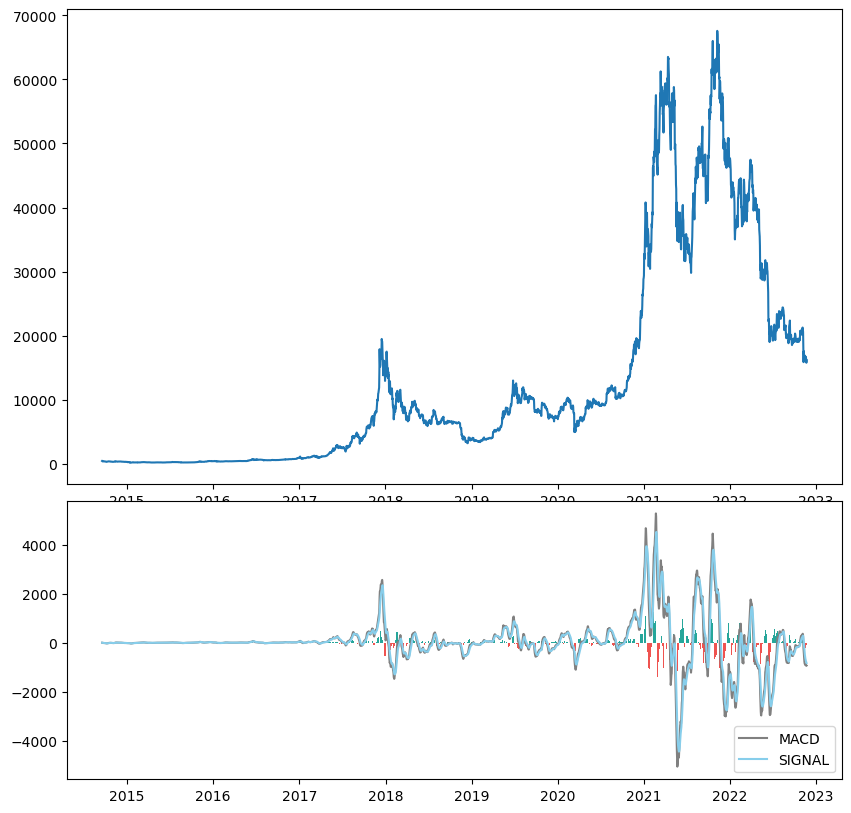

In [80]:
data.set_index('Date',inplace=True);
def plot_macd(prices, macd, signal, hist):
    plt.figure(figsize=(10,10))
    ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
    ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)

    ax1.plot(prices)
    ax2.plot(macd, color = 'grey', linewidth = 1.5, label = 'MACD')
    ax2.plot(signal, color = 'skyblue', linewidth = 1.5, label = 'SIGNAL')

    for i in range(len(prices)):
        if str(hist[i])[0] == '-':
            ax2.bar(prices.index[i], hist[i], color = '#ef5350')
        else:
            ax2.bar(prices.index[i], hist[i], color = '#26a69a')

    plt.legend(loc = 'lower right')

plot_macd(data['Close'], data['macd'], data['signal'], data['hist'])

# Money Flow Index

data.set_index('Date');

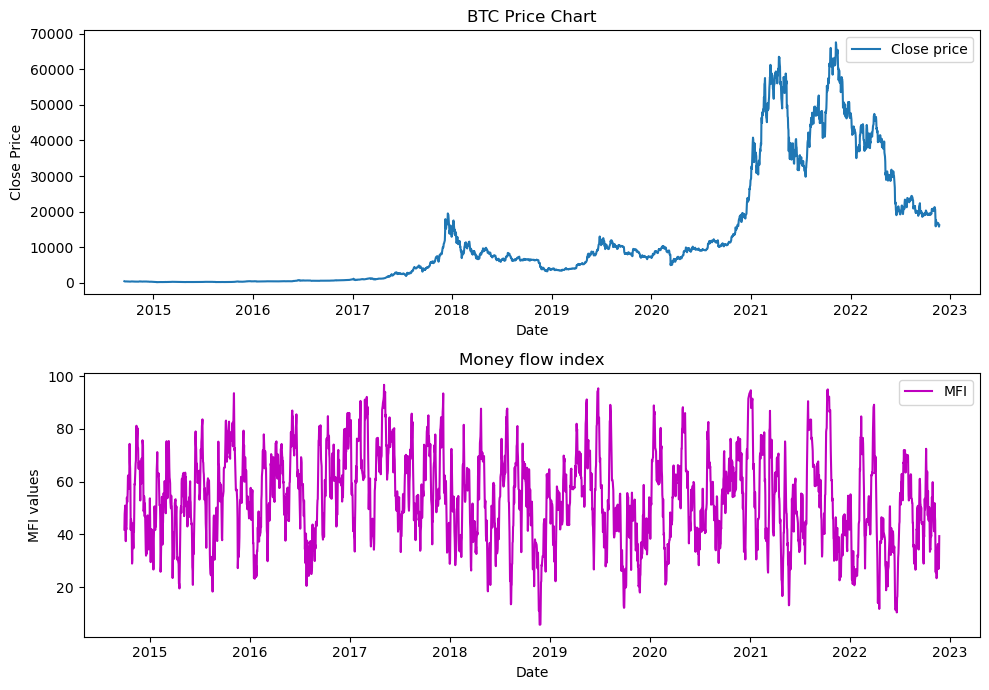

In [81]:
def gain(x):
    return ((x > 0) * x).sum()


def loss(x):
    return ((x < 0) * x).sum()


# Calculate money flow index
def mfi(high, low, close, volume, n=14):
    typical_price = (high + low + close)/3
    money_flow = typical_price * volume
    mf_sign = np.where(typical_price > typical_price.shift(1), 1, -1)
    signed_mf = money_flow * mf_sign
    mf_avg_gain = signed_mf.rolling(n).apply(gain, raw=True)
    mf_avg_loss = signed_mf.rolling(n).apply(loss, raw=True)
    mfi = (100 - (100 / (1 + (mf_avg_gain / abs(mf_avg_loss))))).to_numpy()
    return mfi


data['MFI'] = mfi(data['High'], data['Low'], data['Close'], data['Volume'], 14)

# Plotting the Price Series chart and the MFI below
fig = plt.figure(figsize=(10, 7))

# Define position of 1st subplot
ax = fig.add_subplot(2, 1, 1)

# Set the title and axis labels
plt.title('BTC Price Chart')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.plot(data['Close'], label='Close price')

# Add a legend to the axis
plt.legend()

# Define position of 2nd subplot
bx = fig.add_subplot(2, 1, 2)

# Set the title and axis labels
plt.title('Money flow index')
plt.xlabel('Date')
plt.ylabel('MFI values')

plt.plot(data['MFI'], 'm', label='MFI')

# Add a legend to the axis
plt.legend()

plt.tight_layout()
plt.show()

# PercentagePriceOscillator

In [82]:
from ta.momentum import PercentagePriceOscillator as PPO

classta.momentum.PercentagePriceOscillator(close: pandas.core.series.Series, window_slow: int = 26, window_fast: int = 12, window_sign: int = 9, fillna: bool = False)

In [83]:
ppo1 = PPO(data['Close'])
data['ppo']=ppo1.ppo()
data['ppo_hist']= ppo1.ppo_hist()
data['ppo_signal']= ppo1.ppo_signal()
data

,Open,High,Low,Close,Adj Close,Volume,dateFormatted,MoneyFlowVolume,acc_dist_indicator,aroon_up,aroon_down,aroon_oscillator,Adj Open,Adj High,Adj Low,adx_pos_directional_indicator,adx_neg_directional_indicator,adx,trend,trend_signal,direction,daily_returns,strategy_returns,atr,sma_20,upper_bb,lower_bb,cmf,ch_osc,TP,sma,mad,CCI,cc,EMV,EMV_MA,ForceIndex,mass_index,macd,signal,hist,MFI,ppo,ppo_hist,ppo_signal
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,17sep2014,-7.924336e+06,-7.924336e+06,NaN,NaN,NaN,465.864014,468.174011,452.421997,0.000000,0.000000,0.000000,NaN,0,0,NaN,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,459.310008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,18sep2014,-1.661586e+07,-2.454020e+07,NaN,NaN,NaN,456.859985,456.859985,413.104004,0.000000,0.000000,0.000000,NaN,0,0,-0.071926,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,431.467997,NaN,NaN,NaN,NaN,-3212.366726,NaN,NaN,0.000000,-2.624024,-0.524805,-2.099219,NaN,NaN,NaN,NaN
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,19sep2014,-1.994371e+07,-4.448391e+07,NaN,NaN,NaN,424.102997,427.834991,384.532013,0.000000,0.000000,0.000000,NaN,0,0,-0.069843,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,402.387665,NaN,NaN,NaN,NaN,-3288.687672,NaN,NaN,0.000000,-7.014744,-1.822793,-5.191951,NaN,NaN,NaN,NaN
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,20sep2014,5.107041e+06,-3.937687e+07,NaN,NaN,NaN,394.673004,423.295990,389.882996,0.000000,0.000000,0.000000,NaN,0,0,0.035735,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,407.360992,NaN,NaN,NaN,NaN,36.798798,NaN,NaN,0.000000,-9.249402,-3.308115,-5.941288,NaN,NaN,NaN,NaN
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,21sep2014,-1.100076e+07,-5.037763e+07,NaN,NaN,NaN,408.084991,412.425995,393.181000,0.000000,0.000000,0.000000,NaN,0,0,-0.024659,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,401.476003,NaN,NaN,NaN,NaN,-274.120355,NaN,NaN,0.000000,-11.699137,-4.986319,-6.712818,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-18 00:00:00+00:00,16687.912109,16947.058594,16564.611328,16697.777344,16697.777344,26862218609,18nov2022,-8.155668e+09,4.006859e+12,48.0,64.0,-16.0,16687.912109,16947.058594,16564.611328,10.126249,33.000040,39.869414,16697.777344,1,-1,0.000615,-0.000825,1040.964844,18584.929053,22597.007159,14572.850947,-0.182863,NaN,16736.482422,17837.343029,1520.314772,-48.273363,-37.974943,231.034649,-776.239751,-9.434578e+13,28.179540,-905.266059,-693.326054,-211.940005,31.993947,-4.950561,-1.214989,-3.735572
2022-11-19 00:00:00+00:00,16696.220703,16797.876953,16570.410156,16711.546875,16711.546875,16106223492,19nov2022,3.880689e+09,4.010740e+12,44.0,60.0,-16.0,16696.220703,16797.876953,16570.410156,9.910023,32.295389,40.810105,16711.546875,1,-1,0.000825,0.025115,1032.265904,18388.726221,22362.165536,14415.286905,-0.165037,NaN,16693.277995,17510.024484,1169.394920,-46.562342,-36.809894,-101.249151,-821.272678,-7.144211e+13,28.367826,-891.602268,-732.981297,-158.620971,26.858255,-4.907138,-0.937253,-3.969885
2022-11-20 00:00:00+00:00,16712.919922,16746.779297,16248.692383,16291.832031,16291.832031,21313378652,20nov2022,-1.762145e+10,3.993118e+12,40.0,56.0,-16.0,16712.919922,16746.779297,16248.692383,9.434939,33.843618,41.923598,16291.832031,1,-1,-0.025115,0.030969,1037.473145,18178.529150,22127.351921,14229.706379,-0.179044,NaN,16429.101237,17178.958984,756.271670,-66.101268,-33.790956,-435.628930,-840.314819,-1.063721e+14,28.369759,-904.217834,-767.228604,-136.989230,27.732264,-5.014960,-0.836060,-4.178900


def ppo(tdf, col="Close", sm=12, lm=26):


    tdf[f"sema_{col}_{sm}"] = tdf[col].ewm(span=sm, min_periods=sm, adjust=False).mean()
    tdf[f"lema_{col}_{lm}"] = tdf[col].ewm(span=lm, min_periods=lm, adjust=False).mean()

    tdf["ppo"] = (tdf[f"sema_{col}_{sm}"]-tdf[f"lema_{col}_{lm}"]) / tdf[f"lema_{col}_{lm}"] * 100
    tdf["signal_line"] = tdf.ppo.ewm(span=9, min_periods=9, adjust=False).mean()
    tdf["ppo_hist"] = tdf["ppo"]-tdf["signal_line"]

    return tdf
tdf = data.copy()
tdf=ppo(tdf)
tdf

from plotly.subplots import make_subplots

fig=make_subplots(specs=[[{"secondary_y": True}]])

lastn = 1000
ldf = tdf[-lastn:]
fig.add_trace(go.Candlestick(x=ldf.index,
                open=ldf['open'],
                high=ldf['high'],
                low=ldf['low'],
                close=ldf['close'], 
                 name = 'OHLC Market Data'))

for s in tdf.columns:
    if "sema" in s:
        fig.add_trace(go.Line(x=ldf.index, y=ldf[s], line=dict(
                        color='rgb(104, 204, 204)',

                    ), 
                      name=s.upper()))
    if "lema" in s:
        fig.add_trace(go.Line(x=ldf.index, y=ldf[s], line=dict(
                        color='rgb(255, 24, 24)',

                    ), name=s.upper()))

clrred = 'rgb(222,0,0)'
clrgrn = 'rgb(0,222,0)'
clrs = [clrred if p<0 else clrgrn for p in ldf.ppo_hist]

fig.add_trace(go.Line(x=ldf.index, y=ldf.ppo, name="PPO"),secondary_y=True)
fig.add_trace(go.Bar(x=ldf.index, y=ldf.ppo_hist, name="PPO_Hist", marker=dict(color=clrs)),secondary_y=True)
fig.add_trace(go.Line(x=ldf.index, y=ldf.signal_line, name="Signal_Line"),secondary_y=True)


fig.update_layout(
    title= "AAPL Stock Data (PPO Plot)",
    yaxis_title="Stock's Price in USD",
    xaxis_title="Date")  

fig.show()


# Percentage Volume Oscillator (PVO)

In [84]:
from ta.momentum import PercentageVolumeOscillator as PVO

classta.momentum.PercentageVolumeOscillator(volume: pandas.core.series.Series, window_slow: int = 26, window_fast: int = 12, window_sign: int = 9, fillna: bool = False)

In [85]:
pvo = PVO(data['Volume'])
data['pvo']=pvo.pvo()
data['pvo_hist']=pvo.pvo_hist()
data['pvo_signal']=pvo.pvo_signal()
data.tail()

,Open,High,Low,Close,Adj Close,Volume,dateFormatted,MoneyFlowVolume,acc_dist_indicator,aroon_up,aroon_down,aroon_oscillator,Adj Open,Adj High,Adj Low,adx_pos_directional_indicator,adx_neg_directional_indicator,adx,trend,trend_signal,direction,daily_returns,strategy_returns,atr,sma_20,upper_bb,lower_bb,cmf,ch_osc,TP,sma,mad,CCI,cc,EMV,EMV_MA,ForceIndex,mass_index,macd,signal,hist,MFI,ppo,ppo_hist,ppo_signal,pvo,pvo_hist,pvo_signal
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-11-18 00:00:00+00:00,16687.912109,16947.058594,16564.611328,16697.777344,16697.777344,26862218609,18nov2022,-8.155668e+09,4.006859e+12,48.0,64.0,-16.0,16687.912109,16947.058594,16564.611328,10.126249,33.000040,39.869414,16697.777344,1,-1,0.000615,-0.000825,1040.964844,18584.929053,22597.007159,14572.850947,-0.182863,NaN,16736.482422,17837.343029,1520.314772,-48.273363,-37.974943,231.034649,-776.239751,-9.434578e+13,28.179540,-905.266059,-693.326054,-211.940005,31.993947,-4.950561,-1.214989,-3.735572,-4.766748,-10.330981,5.564234
2022-11-19 00:00:00+00:00,16696.220703,16797.876953,16570.410156,16711.546875,16711.546875,16106223492,19nov2022,3.880689e+09,4.010740e+12,44.0,60.0,-16.0,16696.220703,16797.876953,16570.410156,9.910023,32.295389,40.810105,16711.546875,1,-1,0.000825,0.025115,1032.265904,18388.726221,22362.165536,14415.286905,-0.165037,NaN,16693.277995,17510.024484,1169.394920,-46.562342,-36.809894,-101.249151,-821.272678,-7.144211e+13,28.367826,-891.602268,-732.981297,-158.620971,26.858255,-4.907138,-0.937253,-3.969885,-9.573787,-12.110417,2.536629
2022-11-20 00:00:00+00:00,16712.919922,16746.779297,16248.692383,16291.832031,16291.832031,21313378652,20nov2022,-1.762145e+10,3.993118e+12,40.0,56.0,-16.0,16712.919922,16746.779297,16248.692383,9.434939,33.843618,41.923598,16291.832031,1,-1,-0.025115,0.030969,1037.473145,18178.529150,22127.351921,14229.706379,-0.179044,NaN,16429.101237,17178.958984,756.271670,-66.101268,-33.790956,-435.628930,-840.314819,-1.063721e+14,28.369759,-904.217834,-767.228604,-136.989230,27.732264,-5.014960,-0.836060,-4.178900,-12.526430,-12.050447,-0.475982
2022-11-21 00:00:00+00:00,16291.223633,16291.223633,15599.046875,15787.284180,15787.284180,37429485518,21nov2022,-1.707161e+10,3.976047e+12,36.0,100.0,-64.0,16291.223633,16291.223633,15599.046875,8.802824,37.858721,43.376875,15787.284180,1,-1,-0.030969,-0.025494,1046.723982,17943.629688,21873.572347,14013.687028,-0.192034,NaN,15892.518229,16834.471354,381.772647,-164.487622,-33.480810,-1021.914345,-886.152638,-1.923577e+14,28.285070,-944.046180,-802.592119,-141.454061,28.977981,-5.284555,-0.884524,-4.400031,-11.329596,-8.682891,-2.646705
2022-11-22 00:00:00+00:00,15782.300781,16253.047852,15656.606445,16189.769531,16189.769531,30726828760,22nov2022,2.420702e+10,4.000254e+12,32.0,96.0,-64.0,15782.300781,16253.047852,15656.606445,8.287998,35.644585,44.726346,16189.769531,1,-1,0.025494,NaN,870.679618,17745.142969,21604.216257,13886.069680,-0.124736,NaN,16033.141276,16627.090402,245.403520,-161.353058,-30.278391,18.813029,-583.913960,-1.355989e+14,28.195364,-932.385270,-828.550749,-103.834521,39.344187,-5.255772,-0.684592,-4.571179,-11.731136,-7.267544,-4.463591


# Pring’s Know Sure Thing (KST)

In [86]:
def get_roc(close, n):
    difference = close.diff(n)
    nprev_values = close.shift(n)
    roc = (difference / nprev_values) * 100
    return roc

In [87]:
def get_kst(close, sma1, sma2, sma3, sma4, roc1, roc2, roc3, roc4, signal):
    rcma1 = get_roc(close, roc1).rolling(sma1).mean()
    rcma2 = get_roc(close, roc2).rolling(sma2).mean()
    rcma3 = get_roc(close, roc3).rolling(sma3).mean()
    rcma4 = get_roc(close, roc4).rolling(sma4).mean()
    kst = (rcma1 * 1) + (rcma2 * 2) + (rcma3 * 3) + (rcma4 * 4)
    signal = kst.rolling(signal).mean()
    return kst, signal

data['kst'], data['kst_signal_line'] = get_kst(data['Close'], 10, 10, 10, 15, 10, 15, 20, 30, 9)
data.tail()

,Open,High,Low,Close,Adj Close,Volume,dateFormatted,MoneyFlowVolume,acc_dist_indicator,aroon_up,aroon_down,aroon_oscillator,Adj Open,Adj High,Adj Low,adx_pos_directional_indicator,adx_neg_directional_indicator,adx,trend,trend_signal,direction,daily_returns,strategy_returns,atr,sma_20,upper_bb,lower_bb,cmf,ch_osc,TP,sma,mad,CCI,cc,EMV,EMV_MA,ForceIndex,mass_index,macd,signal,hist,MFI,ppo,ppo_hist,ppo_signal,pvo,pvo_hist,pvo_signal,kst,kst_signal_line
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-11-18 00:00:00+00:00,16687.912109,16947.058594,16564.611328,16697.777344,16697.777344,26862218609,18nov2022,-8.155668e+09,4.006859e+12,48.0,64.0,-16.0,16687.912109,16947.058594,16564.611328,10.126249,33.000040,39.869414,16697.777344,1,-1,0.000615,-0.000825,1040.964844,18584.929053,22597.007159,14572.850947,-0.182863,NaN,16736.482422,17837.343029,1520.314772,-48.273363,-37.974943,231.034649,-776.239751,-9.434578e+13,28.179540,-905.266059,-693.326054,-211.940005,31.993947,-4.950561,-1.214989,-3.735572,-4.766748,-10.330981,5.564234,-131.562296,-59.282405
2022-11-19 00:00:00+00:00,16696.220703,16797.876953,16570.410156,16711.546875,16711.546875,16106223492,19nov2022,3.880689e+09,4.010740e+12,44.0,60.0,-16.0,16696.220703,16797.876953,16570.410156,9.910023,32.295389,40.810105,16711.546875,1,-1,0.000825,0.025115,1032.265904,18388.726221,22362.165536,14415.286905,-0.165037,NaN,16693.277995,17510.024484,1169.394920,-46.562342,-36.809894,-101.249151,-821.272678,-7.144211e+13,28.367826,-891.602268,-732.981297,-158.620971,26.858255,-4.907138,-0.937253,-3.969885,-9.573787,-12.110417,2.536629,-134.026926,-75.984094
2022-11-20 00:00:00+00:00,16712.919922,16746.779297,16248.692383,16291.832031,16291.832031,21313378652,20nov2022,-1.762145e+10,3.993118e+12,40.0,56.0,-16.0,16712.919922,16746.779297,16248.692383,9.434939,33.843618,41.923598,16291.832031,1,-1,-0.025115,0.030969,1037.473145,18178.529150,22127.351921,14229.706379,-0.179044,NaN,16429.101237,17178.958984,756.271670,-66.101268,-33.790956,-435.628930,-840.314819,-1.063721e+14,28.369759,-904.217834,-767.228604,-136.989230,27.732264,-5.014960,-0.836060,-4.178900,-12.526430,-12.050447,-0.475982,-144.420822,-91.998309
2022-11-21 00:00:00+00:00,16291.223633,16291.223633,15599.046875,15787.284180,15787.284180,37429485518,21nov2022,-1.707161e+10,3.976047e+12,36.0,100.0,-64.0,16291.223633,16291.223633,15599.046875,8.802824,37.858721,43.376875,15787.284180,1,-1,-0.030969,-0.025494,1046.723982,17943.629688,21873.572347,14013.687028,-0.192034,NaN,15892.518229,16834.471354,381.772647,-164.487622,-33.480810,-1021.914345,-886.152638,-1.923577e+14,28.285070,-944.046180,-802.592119,-141.454061,28.977981,-5.284555,-0.884524,-4.400031,-11.329596,-8.682891,-2.646705,-155.290385,-107.318700
2022-11-22 00:00:00+00:00,15782.300781,16253.047852,15656.606445,16189.769531,16189.769531,30726828760,22nov2022,2.420702e+10,4.000254e+12,32.0,96.0,-64.0,15782.300781,16253.047852,15656.606445,8.287998,35.644585,44.726346,16189.769531,1,-1,0.025494,NaN,870.679618,17745.142969,21604.216257,13886.069680,-0.124736,NaN,16033.141276,16627.090402,245.403520,-161.353058,-30.278391,18.813029,-583.913960,-1.355989e+14,28.195364,-932.385270,-828.550749,-103.834521,39.344187,-5.255772,-0.684592,-4.571179,-11.731136,-7.267544,-4.463591,-162.479483,-121.255817


# Relative Strength Index

change = data["Close"].diff()
#change.dropna(inplace=True)

change_up = change.copy()
change_down = change.copy()

# 
change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
change.equals(change_up+change_down)

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(14).mean()
avg_down = change_down.rolling(14).mean().abs()

rsi = 100 * avg_up / (avg_up + avg_down)

# Take a look at the 20 oldest datapoints
rsi

In [88]:
data

,Open,High,Low,Close,Adj Close,Volume,dateFormatted,MoneyFlowVolume,acc_dist_indicator,aroon_up,aroon_down,aroon_oscillator,Adj Open,Adj High,Adj Low,adx_pos_directional_indicator,adx_neg_directional_indicator,adx,trend,trend_signal,direction,daily_returns,strategy_returns,atr,sma_20,upper_bb,lower_bb,cmf,ch_osc,TP,sma,mad,CCI,cc,EMV,EMV_MA,ForceIndex,mass_index,macd,signal,hist,MFI,ppo,ppo_hist,ppo_signal,pvo,pvo_hist,pvo_signal,kst,kst_signal_line
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,17sep2014,-7.924336e+06,-7.924336e+06,NaN,NaN,NaN,465.864014,468.174011,452.421997,0.000000,0.000000,0.000000,NaN,0,0,NaN,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,459.310008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,18sep2014,-1.661586e+07,-2.454020e+07,NaN,NaN,NaN,456.859985,456.859985,413.104004,0.000000,0.000000,0.000000,NaN,0,0,-0.071926,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,431.467997,NaN,NaN,NaN,NaN,-3212.366726,NaN,NaN,0.000000,-2.624024,-0.524805,-2.099219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,19sep2014,-1.994371e+07,-4.448391e+07,NaN,NaN,NaN,424.102997,427.834991,384.532013,0.000000,0.000000,0.000000,NaN,0,0,-0.069843,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,402.387665,NaN,NaN,NaN,NaN,-3288.687672,NaN,NaN,0.000000,-7.014744,-1.822793,-5.191951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,20sep2014,5.107041e+06,-3.937687e+07,NaN,NaN,NaN,394.673004,423.295990,389.882996,0.000000,0.000000,0.000000,NaN,0,0,0.035735,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,407.360992,NaN,NaN,NaN,NaN,36.798798,NaN,NaN,0.000000,-9.249402,-3.308115,-5.941288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,21sep2014,-1.100076e+07,-5.037763e+07,NaN,NaN,NaN,408.084991,412.425995,393.181000,0.000000,0.000000,0.000000,NaN,0,0,-0.024659,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,401.476003,NaN,NaN,NaN,NaN,-274.120355,NaN,NaN,0.000000,-11.699137,-4.986319,-6.712818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-18 00:00:00+00:00,16687.912109,16947.058594,16564.611328,16697.777344,16697.777344,26862218609,18nov2022,-8.155668e+09,4.006859e+12,48.0,64.0,-16.0,16687.912109,16947.058594,16564.611328,10.126249,33.000040,39.869414,16697.777344,1,-1,0.000615,-0.000825,1040.964844,18584.929053,22597.007159,14572.850947,-0.182863,NaN,16736.482422,17837.343029,1520.314772,-48.273363,-37.974943,231.034649,-776.239751,-9.434578e+13,28.179540,-905.266059,-693.326054,-211.940005,31.993947,-4.950561,-1.214989,-3.735572,-4.766748,-10.330981,5.564234,-131.562296,-59.282405
2022-11-19 00:00:00+00:00,16696.220703,16797.876953,16570.410156,16711.546875,16711.546875,16106223492,19nov2022,3.880689e+09,4.010740e+12,44.0,60.0,-16.0,16696.220703,16797.876953,16570.410156,9.910023,32.295389,40.810105,16711.546875,1,-1,0.000825,0.025115,1032.265904,18388.726221,22362.165536,14415.286905,-0.165037,NaN,16693.277995,17510.024484,1169.394920,-46.562342,-36.809894,-101.249151,-821.272678,-7.144211e+13,28.367826,-891.602268,-732.981297,-158.620971,26.858255,-4.907138,-0.937253,-3.969885,-9.573787,-12.110417,2.536629,-134.026926,-75.984094
2022-11-20 00:00:00+00:00,16712.919922,16746.779297,16248.692383,16291.832031,16291.832031,21313378652,20nov2022,-1.762145e+10,3.993118e+12,40.0,56.0,-16.0,16712.919922,16746.779297,16248.692383,9.434939,33.843618,41.923598,16291.832031,1,-1,-0.025115,0.030969,1037.473145,18178.529150,22127.351921,14229.706379,-

In [89]:
def get_rsi(close, lookback):
    ret = close.diff()
    #print("ret is", ret)
    up = []
    
    down = []
    for i in range(len(ret)):
        if ret[i] < 0:
            up.append(0)
            down.append(ret[i])
        else:
            up.append(ret[i])
            down.append(0)
    up_series = pd.Series(up)
    down_series = pd.Series(down)#.abs()
    #print("up series is ",up_series)
    #print("down series is ",down_series)

    up_ewm = up_series.ewm(com = lookback - 1, min_periods=lookback,adjust = True).mean()
    down_ewm = down_series.ewm(com = lookback - 1,min_periods=lookback, adjust = True).mean()
    #print("up_ewm is",up_ewm)
    #print("down_ewm is",down_ewm)

    rs = abs(up_ewm/down_ewm)
    rsi = 100 - (100 / (1 + rs))
    #print("rsi is",rsi)
    rsi_df = pd.DataFrame(rsi).rename(columns = {0:'rsi'}).set_index(close.index)
    return rsi_df

data['rsi']=get_rsi(data['Close'], 14)

In [90]:
data

,Open,High,Low,Close,Adj Close,Volume,dateFormatted,MoneyFlowVolume,acc_dist_indicator,aroon_up,aroon_down,aroon_oscillator,Adj Open,Adj High,Adj Low,adx_pos_directional_indicator,adx_neg_directional_indicator,adx,trend,trend_signal,direction,daily_returns,strategy_returns,atr,sma_20,upper_bb,lower_bb,cmf,ch_osc,TP,sma,mad,CCI,cc,EMV,EMV_MA,ForceIndex,mass_index,macd,signal,hist,MFI,ppo,ppo_hist,ppo_signal,pvo,pvo_hist,pvo_signal,kst,kst_signal_line,rsi
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,17sep2014,-7.924336e+06,-7.924336e+06,NaN,NaN,NaN,465.864014,468.174011,452.421997,0.000000,0.000000,0.000000,NaN,0,0,NaN,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,459.310008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,18sep2014,-1.661586e+07,-2.454020e+07,NaN,NaN,NaN,456.859985,456.859985,413.104004,0.000000,0.000000,0.000000,NaN,0,0,-0.071926,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,431.467997,NaN,NaN,NaN,NaN,-3212.366726,NaN,NaN,0.000000,-2.624024,-0.524805,-2.099219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,19sep2014,-1.994371e+07,-4.448391e+07,NaN,NaN,NaN,424.102997,427.834991,384.532013,0.000000,0.000000,0.000000,NaN,0,0,-0.069843,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,402.387665,NaN,NaN,NaN,NaN,-3288.687672,NaN,NaN,0.000000,-7.014744,-1.822793,-5.191951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,20sep2014,5.107041e+06,-3.937687e+07,NaN,NaN,NaN,394.673004,423.295990,389.882996,0.000000,0.000000,0.000000,NaN,0,0,0.035735,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,407.360992,NaN,NaN,NaN,NaN,36.798798,NaN,NaN,0.000000,-9.249402,-3.308115,-5.941288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,21sep2014,-1.100076e+07,-5.037763e+07,NaN,NaN,NaN,408.084991,412.425995,393.181000,0.000000,0.000000,0.000000,NaN,0,0,-0.024659,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,401.476003,NaN,NaN,NaN,NaN,-274.120355,NaN,NaN,0.000000,-11.699137,-4.986319,-6.712818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-18 00:00:00+00:00,16687.912109,16947.058594,16564.611328,16697.777344,16697.777344,26862218609,18nov2022,-8.155668e+09,4.006859e+12,48.0,64.0,-16.0,16687.912109,16947.058594,16564.611328,10.126249,33.000040,39.869414,16697.777344,1,-1,0.000615,-0.000825,1040.964844,18584.929053,22597.007159,14572.850947,-0.182863,NaN,16736.482422,17837.343029,1520.314772,-48.273363,-37.974943,231.034649,-776.239751,-9.434578e+13,28.179540,-905.266059,-693.326054,-211.940005,31.993947,-4.950561,-1.214989,-3.735572,-4.766748,-10.330981,5.564234,-131.562296,-59.282405,36.596694
2022-11-19 00:00:00+00:00,16696.220703,16797.876953,16570.410156,16711.546875,16711.546875,16106223492,19nov2022,3.880689e+09,4.010740e+12,44.0,60.0,-16.0,16696.220703,16797.876953,16570.410156,9.910023,32.295389,40.810105,16711.546875,1,-1,0.000825,0.025115,1032.265904,18388.726221,22362.165536,14415.286905,-0.165037,NaN,16693.277995,17510.024484,1169.394920,-46.562342,-36.809894,-101.249151,-821.272678,-7.144211e+13,28.367826,-891.602268,-732.981297,-158.620971,26.858255,-4.907138,-0.937253,-3.969885,-9.573787,-12.110417,2.536629,-134.026926,-75.984094,36.739994
2022-11-20 00:00:00+00:00,16712.919922,16746.779297,16248.692383,16291.832031,16291.832031,21313378652,20nov2022,-1.762145e+10,3.993118e+12,40.0,56.0,-16.0,16712.919922,16746.779297,16248.692383,9.434939,33.843618,41.923598,16291.832031,1,-1,-0.025115,0.030969,103

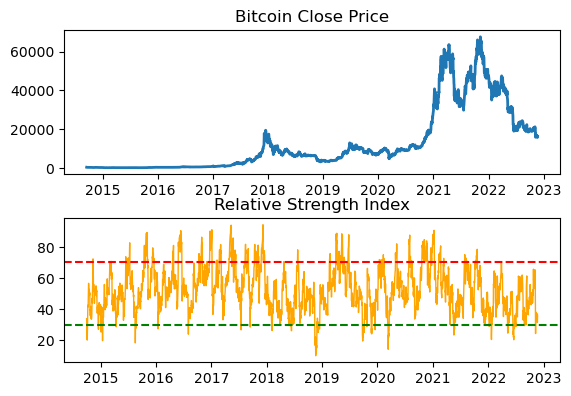

In [91]:
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# First chart:
# Plot the closing price on the first chart
ax1.plot(data['Close'], linewidth=2)
ax1.set_title('Bitcoin Close Price')

# Second chart
# Plot the RSI
ax2.set_title('Relative Strength Index')
ax2.plot(data['rsi'], color='orange', linewidth=1)
# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax2.axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
ax2.axhline(70, linestyle='--', linewidth=1.5, color='red')

# RRG Relative Strength: Uses RS-Ratio not done

In this step, we are going to calculate the values of RSI with 14 as the lookback period using the RSI formula we discussed before.

31. RRG Relative Strength: Uses RS-Ratio //not done

32. StockCharts Technical Rank (SCTR):  //not working

def calculate_trend(values):
    if len(values) == 0:
        return 0, 0
    x = np.arange(1, len(values) + 1, 1)
    y = np.array(values)
    #  Handle nan values
    x_new = x[~np.isnan(y)]
    y_new = y[~np.isnan(y)]
    m, c = np.polyfit(x_new, y_new, 1)
    return m, c

def calculate_ppo_hist_slope(df):
    df['PPO_HIST_SLOPE'] = 0
    for index, row in df.iterrows():
        if index <= 2:
            continue
        ppo_hist_lb = df['PPO_HIST'].values[index - 3: index]
        check_nan = np.isnan(ppo_hist_lb)
        if True in check_nan:
            continue
        m, c = calculate_trend(ppo_hist_lb)
        df.at[index, 'PPO_HIST_SLOPE'] = m
        return df

def calculate_indicators(df):
    #  Long-term
    df['EMA_200'] = ta.ema(df['Close'], length=200)
    df['EMA_200_CLOSE_PC'] = (df['Close'] / df['EMA_200']) * 100
    df['ROC_125'] = ta.momentum.roc(close=df['Close'], window=125)
    #  Mid-term
    df['EMA_50'] = ta.ema(df['Close'], length=50)
    df['EMA_50_CLOSE_PC'] = (df['Close'] / df['EMA_50']) * 100
    df['ROC_20'] = ta.momentum.roc(close=df['Close'], window=20)
    # Short-term
    ppo_ind = PercentagePriceOscillator(close=df['Close'], window_slow=26, window_fast=12, window_sign=9)
    df['PPO'] = ppo_ind.ppo()
    df['PPO_EMA_9'] = ta.ema(df['PPO'], length=9)
    df['PPO_HIST'] = df['Close'] - df['PPO_EMA_9']
    #  Calculate PPO histogram slope
    df = calculate_ppo_hist_slope(df)
    df['RSI'] = ta.momentum.rsi(df['Close'], window=14)
    return df

def calculate_weights(df):
    #  Long-term
    df['EMA_200_CLOSE_PC_WEIGHTED'] = df['EMA_200_CLOSE_PC'] * 0.3
    df['ROC_125_WEIGHTED'] = df['ROC_125'] * 0.3
    #  Mid-term
    df['EMA_50_CLOSE_PC_WEIGHTED'] = df['EMA_50_CLOSE_PC'] * 0.15
    df['ROC_20_WEIGHTED'] = df['ROC_20'] * 0.15
    #  Short-term
    df['RSI_WEIGHTED'] = df['RSI'] * 0.05
    df['PPO_HIST_SLOPE_WEIGHTED'] = 0
    df.loc[df['PPO_HIST_SLOPE'] < -1, 'PPO_HIST_SLOPE_WEIGHTED'] = 0
    df.loc[df['PPO_HIST_SLOPE'] >= -1, 'PPO_HIST_SLOPE_WEIGHTED'] = (df['PPO_HIST_SLOPE'] + 1) * 50 * 0.05
    df.loc[df['PPO_HIST_SLOPE'] > 1, 'PPO_HIST_SLOPE_WEIGHTED'] = 5
    return df

def calculate_sctr(df):
    df['IND_SCORE'] = df['EMA_200_CLOSE_PC_WEIGHTED'] + df['ROC_125_WEIGHTED'] + \
                 df['EMA_50_CLOSE_PC_WEIGHTED'] + df['ROC_20_WEIGHTED'] + \
                 df['RSI_WEIGHTED'] + df['PPO_HIST_SLOPE_WEIGHTED']
    return df

data1= data.copy()
calculate_indicators(data1)

calculate_sctr(data1)

# Standard Deviation (Volatility):

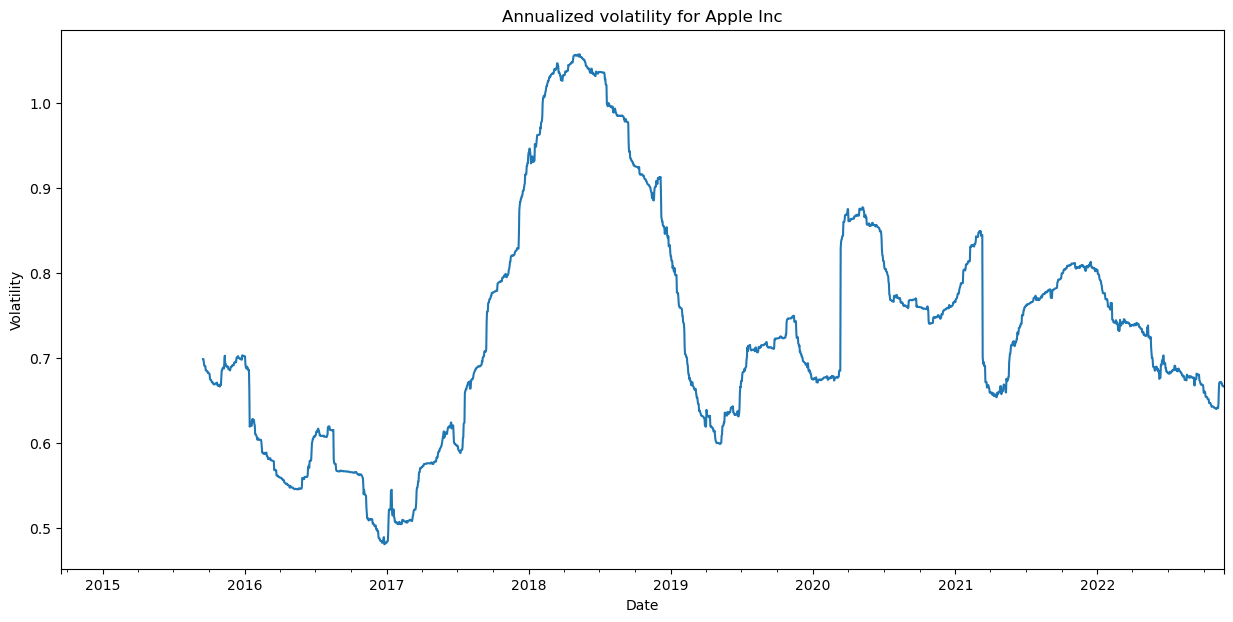

In [92]:
TRADING_DAYS = 365
returns = np.log(data['Close']/data['Close'].shift(1))
returns.fillna(0, inplace=True)
volatility = returns.rolling(window=TRADING_DAYS).std()*np.sqrt(TRADING_DAYS)

fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(1, 1, 1)
volatility.plot(ax=ax1)
ax1.set_xlabel('Date')
ax1.set_ylabel('Volatility')
ax1.set_title('Annualized volatility for Apple Inc')
plt.show()

In [93]:
volatility[:366]

Date
2014-09-17 00:00:00+00:00         NaN
2014-09-18 00:00:00+00:00         NaN
2014-09-19 00:00:00+00:00         NaN
2014-09-20 00:00:00+00:00         NaN
2014-09-21 00:00:00+00:00         NaN
                               ...   
2015-09-13 00:00:00+00:00         NaN
2015-09-14 00:00:00+00:00         NaN
2015-09-15 00:00:00+00:00         NaN
2015-09-16 00:00:00+00:00    0.698791
2015-09-17 00:00:00+00:00    0.698806
Name: Close, Length: 366, dtype: float64

# 35. Stochastic Oscillator (Fast, Slow,

In [94]:
def add_stochastic_oscillator(df, periods=14):    
    high_roll = df["High"].rolling(periods).max()
    low_roll = df["Low"].rolling(periods).min()
    
    # Fast stochastic indicator
    num = data["Close"] - low_roll
    denom = high_roll - low_roll
    df["%K"] = (num / denom) * 100
    
    # Slow stochastic indicator
    df["%D"] = data["%K"].rolling(3).mean()
    
    return df

In [95]:
add_stochastic_oscillator(data)

,Open,High,Low,Close,Adj Close,Volume,dateFormatted,MoneyFlowVolume,acc_dist_indicator,aroon_up,aroon_down,aroon_oscillator,Adj Open,Adj High,Adj Low,adx_pos_directional_indicator,adx_neg_directional_indicator,adx,trend,trend_signal,direction,daily_returns,strategy_returns,atr,sma_20,upper_bb,lower_bb,cmf,ch_osc,TP,sma,mad,CCI,cc,EMV,EMV_MA,ForceIndex,mass_index,macd,signal,hist,MFI,ppo,ppo_hist,ppo_signal,pvo,pvo_hist,pvo_signal,kst,kst_signal_line,rsi,%K,%D
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,17sep2014,-7.924336e+06,-7.924336e+06,NaN,NaN,NaN,465.864014,468.174011,452.421997,0.000000,0.000000,0.000000,NaN,0,0,NaN,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,459.310008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,18sep2014,-1.661586e+07,-2.454020e+07,NaN,NaN,NaN,456.859985,456.859985,413.104004,0.000000,0.000000,0.000000,NaN,0,0,-0.071926,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,431.467997,NaN,NaN,NaN,NaN,-3212.366726,NaN,NaN,0.000000,-2.624024,-0.524805,-2.099219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,19sep2014,-1.994371e+07,-4.448391e+07,NaN,NaN,NaN,424.102997,427.834991,384.532013,0.000000,0.000000,0.000000,NaN,0,0,-0.069843,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,402.387665,NaN,NaN,NaN,NaN,-3288.687672,NaN,NaN,0.000000,-7.014744,-1.822793,-5.191951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,20sep2014,5.107041e+06,-3.937687e+07,NaN,NaN,NaN,394.673004,423.295990,389.882996,0.000000,0.000000,0.000000,NaN,0,0,0.035735,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,407.360992,NaN,NaN,NaN,NaN,36.798798,NaN,NaN,0.000000,-9.249402,-3.308115,-5.941288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,21sep2014,-1.100076e+07,-5.037763e+07,NaN,NaN,NaN,408.084991,412.425995,393.181000,0.000000,0.000000,0.000000,NaN,0,0,-0.024659,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,401.476003,NaN,NaN,NaN,NaN,-274.120355,NaN,NaN,0.000000,-11.699137,-4.986319,-6.712818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-18 00:00:00+00:00,16687.912109,16947.058594,16564.611328,16697.777344,16697.777344,26862218609,18nov2022,-8.155668e+09,4.006859e+12,48.0,64.0,-16.0,16687.912109,16947.058594,16564.611328,10.126249,33.000040,39.869414,16697.777344,1,-1,0.000615,-0.000825,1040.964844,18584.929053,22597.007159,14572.850947,-0.182863,NaN,16736.482422,17837.343029,1520.314772,-48.273363,-37.974943,231.034649,-776.239751,-9.434578e+13,28.179540,-905.266059,-693.326054,-211.940005,31.993947,-4.950561,-1.214989,-3.735572,-4.766748,-10.330981,5.564234,-131.562296,-59.282405,36.596694,17.610179,17.386976
2022-11-19 00:00:00+00:00,16696.220703,16797.876953,16570.410156,16711.546875,16711.546875,16106223492,19nov2022,3.880689e+09,4.010740e+12,44.0,60.0,-16.0,16696.220703,16797.876953,16570.410156,9.910023,32.295389,40.810105,16711.546875,1,-1,0.000825,0.025115,1032.265904,18388.726221,22362.165536,14415.286905,-0.165037,NaN,16693.277995,17510.024484,1169.394920,-46.562342,-36.809894,-101.249151,-821.272678,-7.144211e+13,28.367826,-891.602268,-732.981297,-158.620971,26.858255,-4.907138,-0.937253,-3.969885,-9.573787,-12.110417,2.536629,-134.026926,-75.984094,36.739994,18.169024,17.737130
2022-11-20 00:00:00+00:00,16712.919922,16746.779297,16248.692383,16291.832031,16291.832031,21313378652,20nov2022,-1.762145e+10,3.993118e+12,40.0,56.0,-16.0,16712.919922

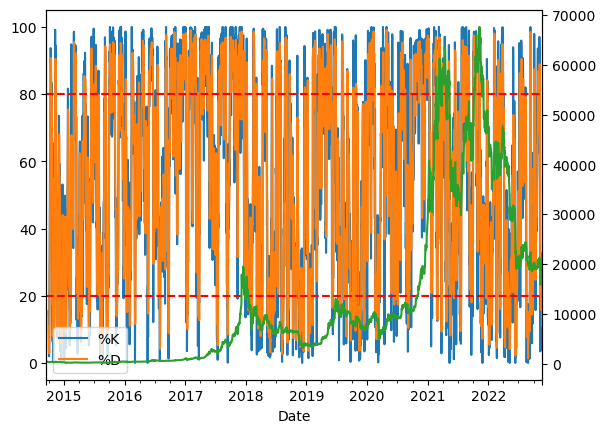

In [96]:
ax = data[['%K', '%D']].plot()
data['Adj Close'].plot(ax=ax, secondary_y=True)
ax.axhline(20, linestyle='--', color="r")
ax.axhline(80, linestyle="--", color="r")
plt.show()

# TRIX: A triple-smoothed moving

In [97]:
data['Close']

Date
2014-09-17 00:00:00+00:00      457.334015
2014-09-18 00:00:00+00:00      424.440002
2014-09-19 00:00:00+00:00      394.795990
2014-09-20 00:00:00+00:00      408.903992
2014-09-21 00:00:00+00:00      398.821014
                                 ...     
2022-11-18 00:00:00+00:00    16697.777344
2022-11-19 00:00:00+00:00    16711.546875
2022-11-20 00:00:00+00:00    16291.832031
2022-11-21 00:00:00+00:00    15787.284180
2022-11-22 00:00:00+00:00    16189.769531
Name: Close, Length: 2989, dtype: float64

In [98]:
data['Trix']=TRIXIndicator(close=data['Close'], window = 15, fillna = False).trix()


#  Ulcer Index: An indicator designed to

In [99]:
def calc_ulcer_index(security, column_name='UlcerIndex', periods=14):
    # Returns a dataframe read from filepath with ulcer index as an added column
    # Ulcer Index formula:
    # 1) Percentage Drawdown = [(Close - N-period High Close)/N-period High Close] x 100
    # 2) Squared Average = (N-period Sum of Percent-Drawdown Squared)/N
    # 3) Ulcer Index = Square Root of Squared Average
     
    period_high_close = security['Close'].rolling(periods + 1).apply(lambda x: np.amax(x), raw=True)
    percentage_drawdown = security['Close']
    percentage_drawdown = (percentage_drawdown - period_high_close)/period_high_close * 100
    percentage_drawdown = np.clip(percentage_drawdown, a_min=None, a_max=0)
    percentage_drawdown = percentage_drawdown ** 2
    percentage_drawdown = percentage_drawdown.fillna(0)
    period_sum = percentage_drawdown.rolling(periods+1).sum()
    squared_average = round((period_sum / periods), 2)
    ulcer_index = round(squared_average ** 0.5, 2)
    return ulcer_index

#    security[column_name] = ulcer_index
#    return security


In [100]:
data['ulcer_index']=calc_ulcer_index(data)

# AwesomeOscillatorIndicator

In [101]:
data['AwesomeOscillatorIndicator']=AwesomeOscillatorIndicator(data['High'], data['Low'], window1 = 5, window2 = 34, fillna = False).awesome_oscillator()

#  Vortex Indicator

In [102]:
VI = VortexIndicator(data['High'], data['Low'], data['Close'], window = 14, fillna = False)

In [103]:
data['VI_diff']=VI.vortex_indicator_diff()

data['VI_neg']=VI.vortex_indicator_neg()

data['VI_pos']=VI.vortex_indicator_pos()


In [104]:
data

,Open,High,Low,Close,Adj Close,Volume,dateFormatted,MoneyFlowVolume,acc_dist_indicator,aroon_up,aroon_down,aroon_oscillator,Adj Open,Adj High,Adj Low,adx_pos_directional_indicator,adx_neg_directional_indicator,adx,trend,trend_signal,direction,daily_returns,strategy_returns,atr,sma_20,upper_bb,lower_bb,cmf,ch_osc,TP,sma,mad,CCI,cc,EMV,EMV_MA,ForceIndex,mass_index,macd,signal,hist,MFI,ppo,ppo_hist,ppo_signal,pvo,pvo_hist,pvo_signal,kst,kst_signal_line,rsi,%K,%D,Trix,ulcer_index,AwesomeOscillatorIndicator,VI_diff,VI_neg,VI_pos
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,17sep2014,-7.924336e+06,-7.924336e+06,NaN,NaN,NaN,465.864014,468.174011,452.421997,0.000000,0.000000,0.000000,NaN,0,0,NaN,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,459.310008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,18sep2014,-1.661586e+07,-2.454020e+07,NaN,NaN,NaN,456.859985,456.859985,413.104004,0.000000,0.000000,0.000000,NaN,0,0,-0.071926,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,431.467997,NaN,NaN,NaN,NaN,-3212.366726,NaN,NaN,0.000000,-2.624024,-0.524805,-2.099219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,19sep2014,-1.994371e+07,-4.448391e+07,NaN,NaN,NaN,424.102997,427.834991,384.532013,0.000000,0.000000,0.000000,NaN,0,0,-0.069843,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,402.387665,NaN,NaN,NaN,NaN,-3288.687672,NaN,NaN,0.000000,-7.014744,-1.822793,-5.191951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,20sep2014,5.107041e+06,-3.937687e+07,NaN,NaN,NaN,394.673004,423.295990,389.882996,0.000000,0.000000,0.000000,NaN,0,0,0.035735,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,407.360992,NaN,NaN,NaN,NaN,36.798798,NaN,NaN,0.000000,-9.249402,-3.308115,-5.941288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,21sep2014,-1.100076e+07,-5.037763e+07,NaN,NaN,NaN,408.084991,412.425995,393.181000,0.000000,0.000000,0.000000,NaN,0,0,-0.024659,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,401.476003,NaN,NaN,NaN,NaN,-274.120355,NaN,NaN,0.000000,-11.699137,-4.986319,-6.712818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-18 00:00:00+00:00,16687.912109,16947.058594,16564.611328,16697.777344,16697.777344,26862218609,18nov2022,-8.155668e+09,4.006859e+12,48.0,64.0,-16.0,16687.912109,16947.058594,16564.611328,10.126249,33.000040,39.869414,16697.777344,1,-1,0.000615,-0.000825,1040.964844,18584.929053,22597.007159,14572.850947,-0.182863,NaN,16736.482422,17837.343029,1520.314772,-48.273363,-37.974943,231.034649,-776.239751,-9.434578e+13,28.179540,-905.266059,-693.326054,-211.940005,31.993947,-4.950561,-1.214989,-3.735572,-4.766748,-10.330981,5.564234,-131.562296,-59.282405,36.596694,17.610179,17.386976,-0.488194,18.54,-2417.961661,-0.541113,1.292483,0.751370
2022-11-19 00:00:00+00:00,16696.220703,16797.876953,16570.410156,16711.546875,16711.546875,16106223492,19nov2022,3.880689e+09,4.010740e+12,44.0,60.0,-16.0,16696.220703,16797.876953,16570.410156,9.910023,32.295389,40.810105,16711.546875,1,-1,0.000825,0.025115,1032.265904,18388.726221,22362.165536,14415.286905,-0.165037,NaN,16693.277995,17510.024484,1169.394920,-46.562342,-36.809894,-101.249151,-821.272678,-7.144211e+13,28.367826,-891.602268,-732.981297,-158.620971,26.858255,-4.90713

# WilliamsRIndicator

In [105]:
WI = WilliamsRIndicator(data['High'], data['Low'], data['Close'], lbp = 14, fillna = False)
data['WilliamsR'] = WI.williams_r()

In [106]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,dateFormatted,MoneyFlowVolume,acc_dist_indicator,aroon_up,aroon_down,aroon_oscillator,Adj Open,Adj High,Adj Low,adx_pos_directional_indicator,adx_neg_directional_indicator,adx,trend,trend_signal,direction,daily_returns,strategy_returns,atr,sma_20,upper_bb,lower_bb,cmf,ch_osc,TP,sma,mad,CCI,cc,EMV,EMV_MA,ForceIndex,mass_index,macd,signal,hist,MFI,ppo,ppo_hist,ppo_signal,pvo,pvo_hist,pvo_signal,kst,kst_signal_line,rsi,%K,%D,Trix,ulcer_index,AwesomeOscillatorIndicator,VI_diff,VI_neg,VI_pos,WilliamsR
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-11-18 00:00:00+00:00,16687.912109,16947.058594,16564.611328,16697.777344,16697.777344,26862218609,18nov2022,-8.155668e+09,4.006859e+12,48.0,64.0,-16.0,16687.912109,16947.058594,16564.611328,10.126249,33.000040,39.869414,16697.777344,1,-1,0.000615,-0.000825,1040.964844,18584.929053,22597.007159,14572.850947,-0.182863,NaN,16736.482422,17837.343029,1520.314772,-48.273363,-37.974943,231.034649,-776.239751,-9.434578e+13,28.179540,-905.266059,-693.326054,-211.940005,31.993947,-4.950561,-1.214989,-3.735572,-4.766748,-10.330981,5.564234,-131.562296,-59.282405,36.596694,17.610179,17.386976,-0.488194,18.54,-2417.961661,-0.541113,1.292483,0.751370,-82.389821
2022-11-19 00:00:00+00:00,16696.220703,16797.876953,16570.410156,16711.546875,16711.546875,16106223492,19nov2022,3.880689e+09,4.010740e+12,44.0,60.0,-16.0,16696.220703,16797.876953,16570.410156,9.910023,32.295389,40.810105,16711.546875,1,-1,0.000825,0.025115,1032.265904,18388.726221,22362.165536,14415.286905,-0.165037,NaN,16693.277995,17510.024484,1169.394920,-46.562342,-36.809894,-101.249151,-821.272678,-7.144211e+13,28.367826,-891.602268,-732.981297,-158.620971,26.858255,-4.907138,-0.937253,-3.969885,-9.573787,-12.110417,2.536629,-134.026926,-75.984094,36.739994,18.169024,17.737130,-0.528761,19.41,-2304.503182,-0.634958,1.321692,0.686735,-81.830976
2022-11-20 00:00:00+00:00,16712.919922,16746.779297,16248.692383,16291.832031,16291.832031,21313378652,20nov2022,-1.762145e+10,3.993118e+12,40.0,56.0,-16.0,16712.919922,16746.779297,16248.692383,9.434939,33.843618,41.923598,16291.832031,1,-1,-0.025115,0.030969,1037.473145,18178.529150,22127.351921,14229.706379,-0.179044,NaN,16429.101237,17178.958984,756.271670,-66.101268,-33.790956,-435.628930,-840.314819,-1.063721e+14,28.369759,-904.217834,-767.228604,-136.989230,27.732264,-5.014960,-0.836060,-4.178900,-12.526430,-12.050447,-0.475982,-144.420822,-91.998309,34.202458,11.342213,15.707139,-0.565111,20.29,-2278.912308,-0.638233,1.316607,0.678374,-88.657787
2022-11-21 00:00:00+00:00,16291.223633,16291.223633,15599.046875,15787.284180,15787.284180,37429485518,21nov2022,-1.707161e+10,3.976047e+12,36.0,100.0,-64.0,16291.223633,16291.223633,15599.046875,8.802824,37.858721,43.376875,15787.284180,1,-1,-0.030969,-0.025494,1046.723982,17943.629688,21873.572347,14013.687028,-0.192034,NaN,15892.518229,16834.471354,381.772647,-164.487622,-33.480810,-1021.914345,-886.152638,-1.923577e+14,28.285070,-944.046180,-802.592119,-141.454061,28.977981,-5.284555,-0.884524,-4.400031,-11.329596,-8.682891,-2.646705,-155.290385,-107.318700,31.395279,3.716021,11.075753,-0.601362,21.22,-2327.139218,-0.658718,1.324919,0.666201,-96.283979
2022-11-22 00:00:00+00:00,15782.300781,16253.047852,15656.606445,16189.769531,16189.769531,30726828760,22nov2022,2.420702e+10,4.000254e+12,32.0,96.0,-64.0,15782.300781,16253.047852,15656.606445,8.287998,35.644585,44.726346,16189.769531,1,-1,0.025494,NaN,870.679618,17745.142969,21604.216257,13886.069680,-0.124736,NaN,16033.141276,16627.090402,245.403520,-161.353058,-30.278391,18.813029,-583.913960,-1.355989e+14,28.195364,-932.385270,-828.550749,-103.834521,39.344187,-5.255772,-0.684592,-4.571179,-11.731136,-7.267544,-4.463591,-162.479483,-121.255817,35.913931,19.747284,11.601840,-0.631050,21.48,-2358.320663,-0.521637,1.361864,0.840228,-80.252716
